# Forecasting

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
# pip install --upgrade tensorflow

In [3]:
data = pd.read_excel(r"Airlines+Data.xlsx")
print("data Shape:",data.shape)
data.tail()

data Shape: (96, 2)


,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


<Axes: >

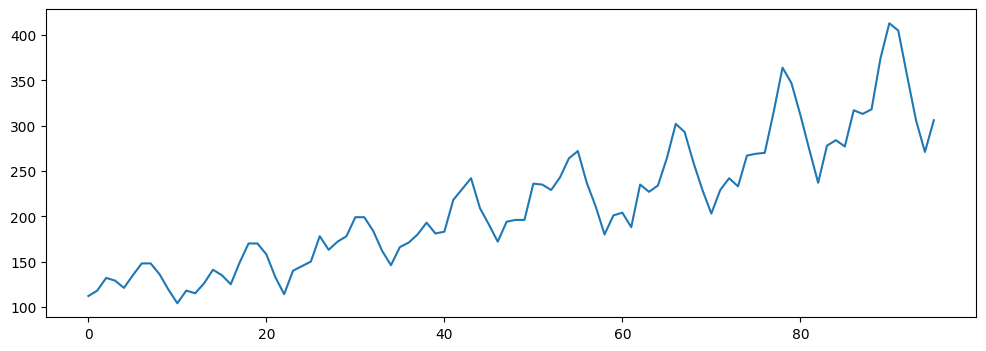

In [4]:
data.Passengers.plot(figsize=(12,4))

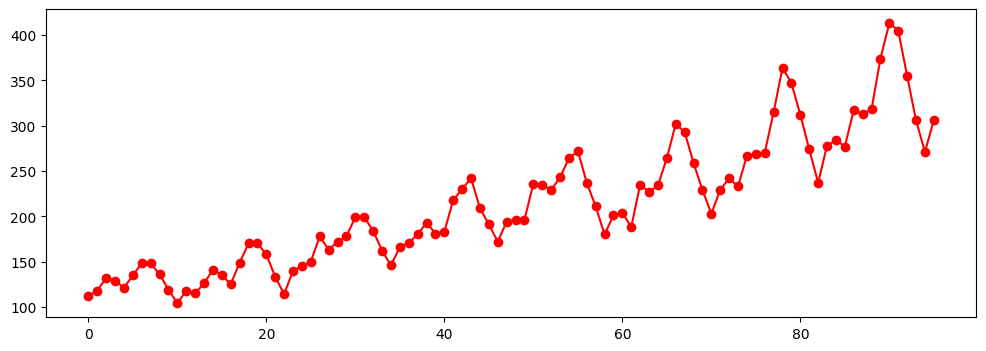

In [5]:
data['Passengers'].plot(figsize=(12,4),color='red',marker='o')
plt.show()

### EDA and Data Visualization

In [6]:
data.rename({'Month':'Date'}, axis = 1, inplace = True)
data

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [7]:
# data.rename({'Month':'Date'}, axis = 1, inplace = True)
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")
data["Month"] = data.Date.dt.strftime("%b") # month extraction
data["Year"] = data.Date.dt.strftime("%Y") # year extraction
data.tail(10)

,Date,Passengers,Month,Year
86,2002-03-01,317,Mar,2002
87,2002-04-01,313,Apr,2002
88,2002-05-01,318,May,2002
89,2002-06-01,374,Jun,2002
90,2002-07-01,413,Jul,2002
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002
95,2002-12-01,306,Dec,2002


the 'Year' column contains string values instead of numeric values. To convert

In [8]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [9]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print('\nNumber of unique duplicates:', len(data[data.duplicated()]));   print(data[data.duplicated()].value_counts())
# duplicate_counts = data[data.duplicated()].value_counts().reset_index(name='Count')['Count']
data=data.drop_duplicates();  print("data Shape:",data.shape)


 Describe:
                      Date  Passengers         Year
count                   96   96.000000    96.000000
mean   1998-12-16 05:00:00  213.708333  1998.500000
min    1995-01-01 00:00:00  104.000000  1995.000000
25%    1996-12-24 06:00:00  156.000000  1996.750000
50%    1998-12-16 12:00:00  200.000000  1998.500000
75%    2000-12-08 18:00:00  264.750000  2000.250000
max    2002-12-01 00:00:00  413.000000  2002.000000
std                    NaN   71.918216     2.303316

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Month       96 non-null     object        
 3   Year        96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.1+ KB
None

 Null values:
Date          0
Passengers    0
M

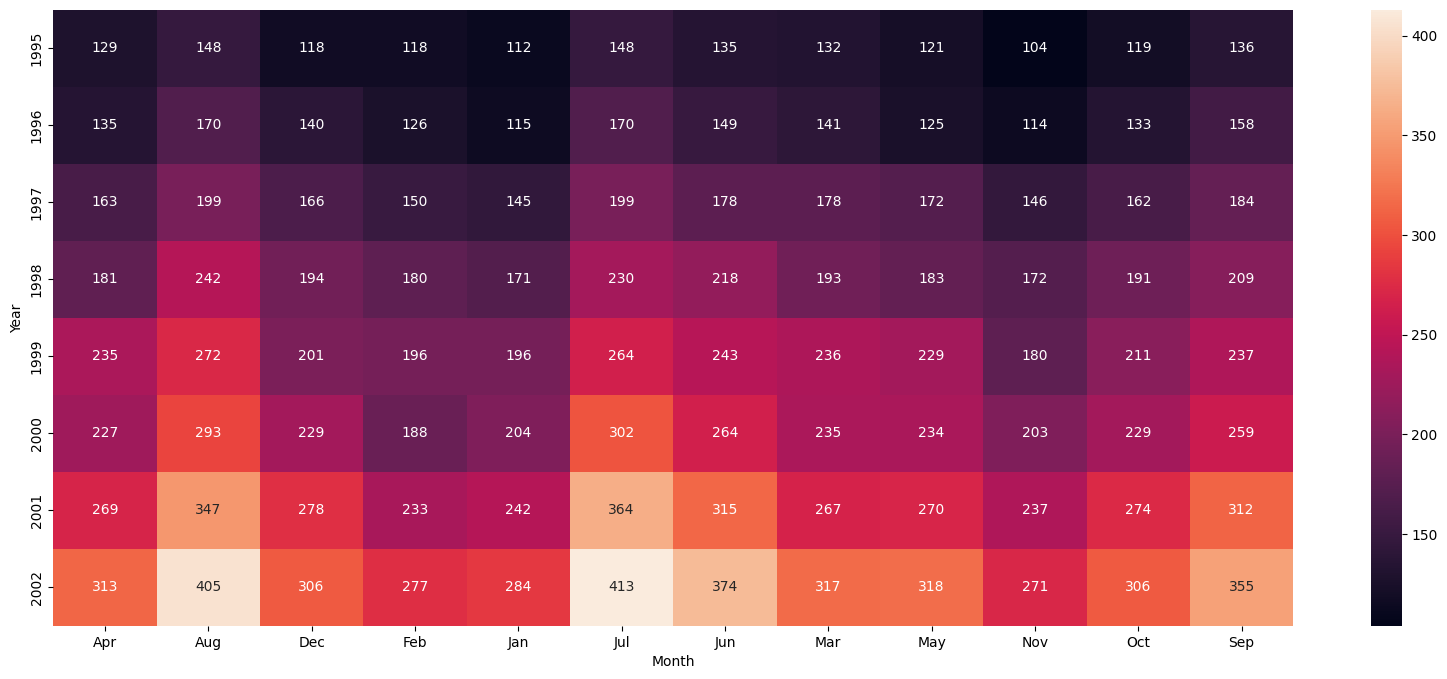

In [10]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid valu
plt.show()

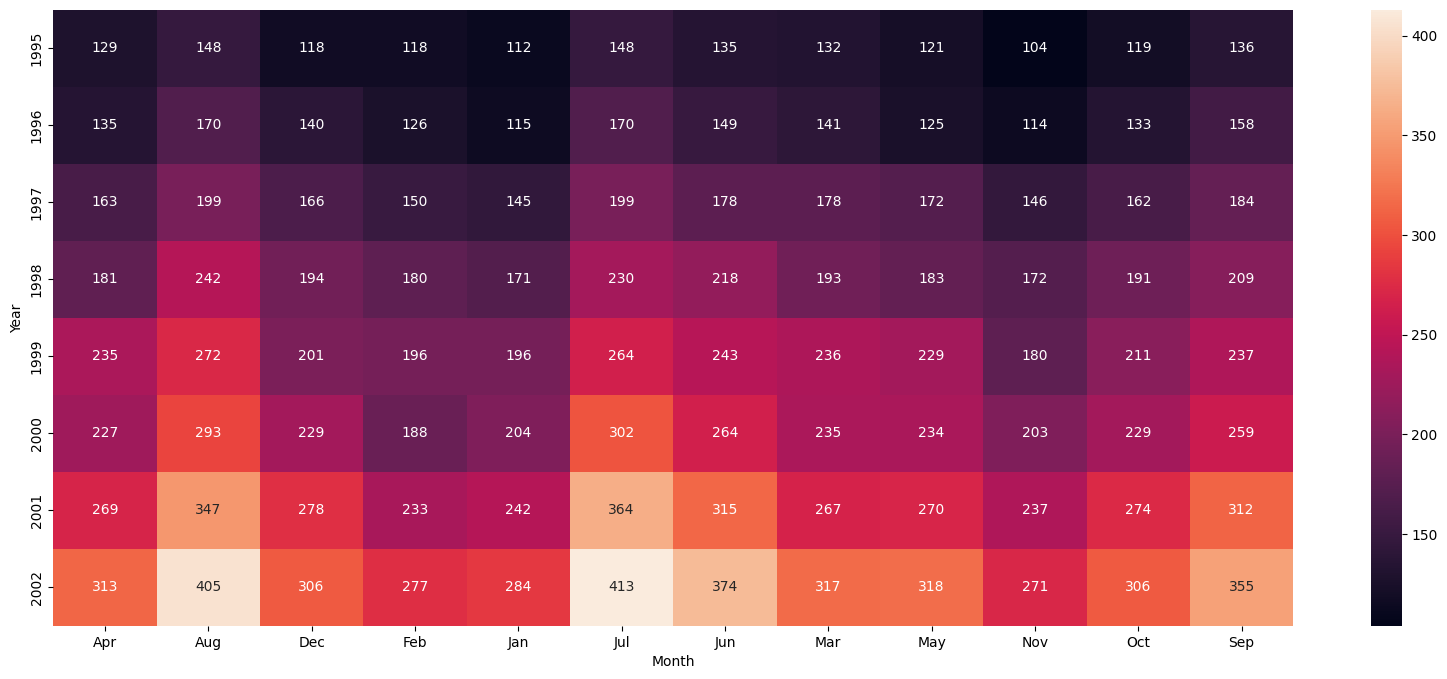

In [11]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="Year",columns="Month",aggfunc="sum",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid valu
plt.show()

## Variable check

### Find columns with the same values

In [12]:
# Find columns with the same values
columns_with_same_values = data.columns[data.nunique() == 1].tolist()

for column in columns_with_same_values:
    unique_values = data[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

# excluding columns_with_same_values
data = data.drop(columns=columns_with_same_values)
print("excluded columns_with_same_values, nos:",columns_with_same_values ,",Final shape:", data.shape)

excluded columns_with_same_values, nos: [] ,Final shape: (96, 4)


In [13]:
# Discrete Variables Count
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

# Continuous Feature Count
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('\nContinuous Feature Count {}'.format(len(continuous_feature)))
print(continuous_feature)

# Other Features Count
other_feature = [feature for feature in data.columns if feature not in discrete_feature and feature not in continuous_feature]
print('\nOther Features Count: {}'.format(len(other_feature)))
print('Other Features: {}'.format(other_feature))

# Numeric Data
numeric_data = data.select_dtypes(include='number')
print('\nNumeric Data Shape:', numeric_data.shape)
print(numeric_data.columns)

# Categorical Data
categorical_data = data.select_dtypes(include='object')
print('\nCategorical Data Shape:', categorical_data.shape)
print('Categorical Columns:', categorical_data.columns)

Discrete Variables Count: 2
['Month', 'Year']

Continuous Feature Count 2
['Date', 'Passengers']

Other Features Count: 0
Other Features: []

Numeric Data Shape: (96, 2)
Index(['Passengers', 'Year'], dtype='object')

Categorical Data Shape: (96, 1)
Categorical Columns: Index(['Month'], dtype='object')


## Categorical Data

Count Plot

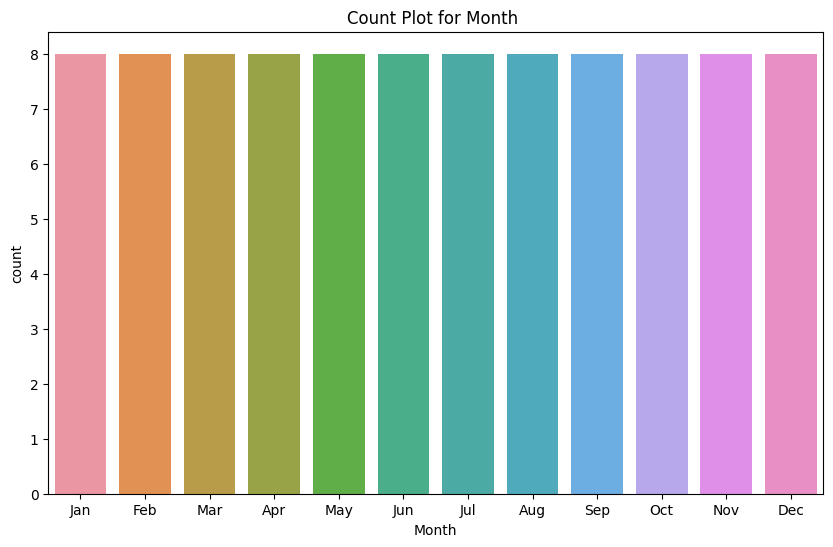

In [14]:
categorical_columns = categorical_data.columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_data, x=column)
    plt.title(f'Count Plot for {column} ')
    plt.show()

### Labelencoder to convert categorical data into numeric

In [15]:
cat_data = categorical_data.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_data.columns:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
    
    print(f"\nLabel Encoding for {column}:")
    # print("\n", cat_data[column].value_counts())
    unique_values = categorical_data[column].unique()

    for value in unique_values:
        label = label_encoder.transform([value])[0]
        counts = cat_data[column].value_counts()[label]
        print(f"Value: {value} -> Label: {label} --> Counts: {counts}")
    


Label Encoding for Month:
Value: Jan -> Label: 4 --> Counts: 8
Value: Feb -> Label: 3 --> Counts: 8
Value: Mar -> Label: 7 --> Counts: 8
Value: Apr -> Label: 0 --> Counts: 8
Value: May -> Label: 8 --> Counts: 8
Value: Jun -> Label: 6 --> Counts: 8
Value: Jul -> Label: 5 --> Counts: 8
Value: Aug -> Label: 1 --> Counts: 8
Value: Sep -> Label: 11 --> Counts: 8
Value: Oct -> Label: 10 --> Counts: 8
Value: Nov -> Label: 9 --> Counts: 8
Value: Dec -> Label: 2 --> Counts: 8


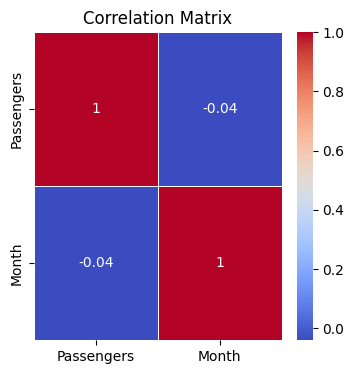

In [16]:
# Correlation Plot
cat_data=pd.concat([numeric_data['Passengers'],cat_data],axis=1)
corr_matrix = cat_data.corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Numeric Data

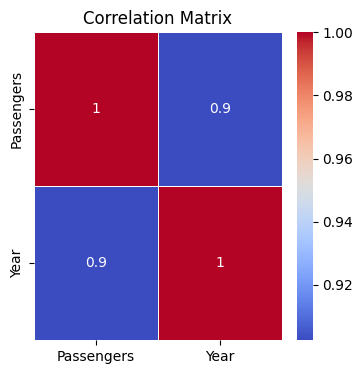

In [17]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

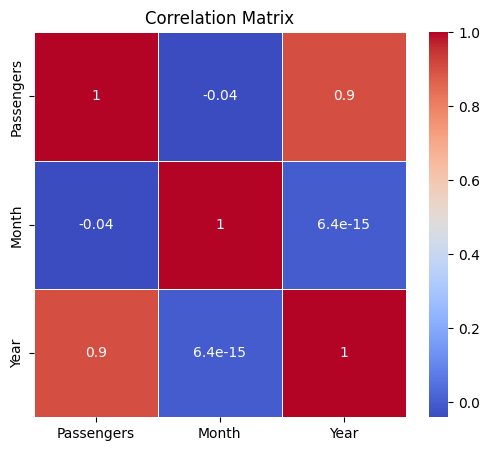

In [18]:
# # # Correlation Plot with All variable
data_2 = data.copy()
data_2[categorical_data.columns]=cat_data[categorical_data.columns]
corr_matrix = data_2.corr(numeric_only=True)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### visualization

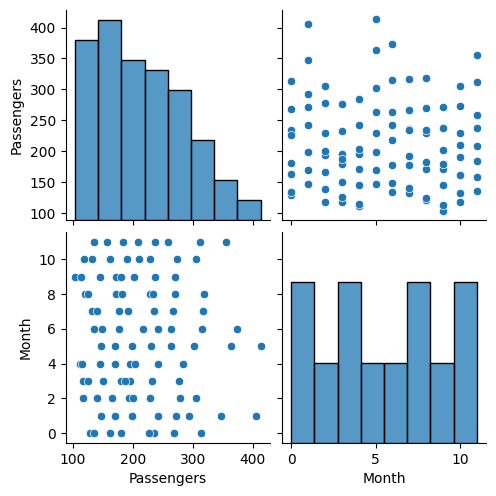

In [19]:
# relationship plot for categorical data
sns.pairplot(data= cat_data)
plt.show()

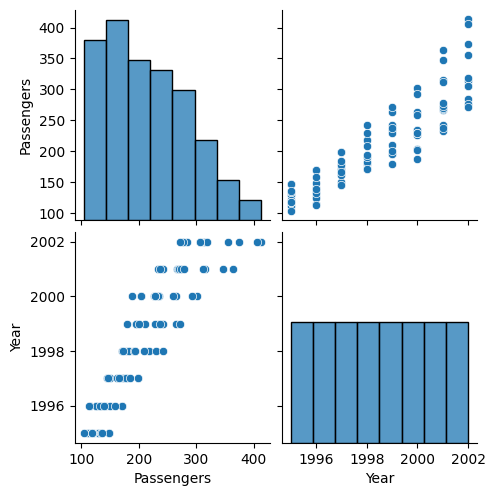

In [20]:
# relationship plot for numeric data
sns.pairplot(data= numeric_data)
plt.show()

### Detect outliers and handle them

In [21]:
# data_filtered=data_2
data_filtered=pd.concat([numeric_data,cat_data[categorical_data.columns]],axis=1)    #,cat_data ,numeric_data, data_2
data_filtered.shape

(96, 3)

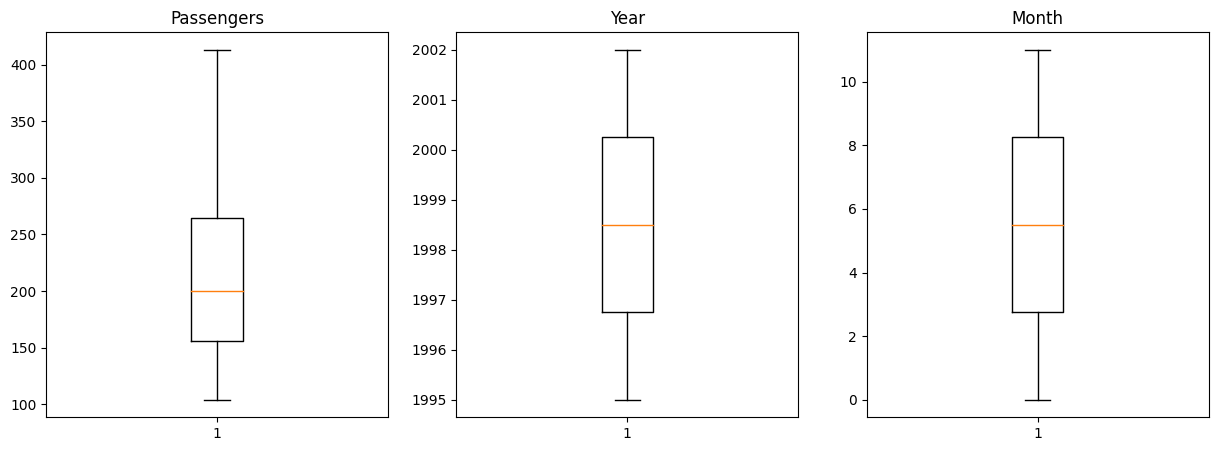

In [22]:
# display boxplots

num_columns = len(data_filtered.columns)                     # numeric_data.columns
subplots_per_row = 3
num_rows = (num_columns + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.boxplot(data_filtered.iloc[:, i])
    ax.set_title(data_filtered.columns[i])

# Hide any remaining empty subplots
for i in range(num_columns, num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


#### Treating outliers with IQR

In [23]:
num_columns = len(numeric_data.columns)
new_data = data_filtered.copy()

for i in range(num_columns):
    # print("\n\nColumn Name:",(data_filtered.columns[i]))
    print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data_filtered.columns[i] + "\033[0m")

    # Calculate the IQR
    Q1 = data_filtered.iloc[:, i].quantile(0.25)
    Q3 = data_filtered.iloc[:, i].quantile(0.75)
    IQR = Q3 - Q1
        
    # Identify and mark outliers using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(data_filtered[(data_filtered.iloc[:, i] > upper_bound) | (data_filtered.iloc[:, i] < lower_bound)].tail(2))
    
    # # Changing the outliers
    # new_data.loc[(new_data[data_filtered.columns[i]] > upper_bound), data_filtered.columns[i]] = upper_bound
    # new_data.loc[(new_data[data_filtered.columns[i]] < lower_bound), data_filtered.columns[i]] = lower_bound
    
    # # Drop rows with outliers
    # outliers = new_data[(new_data.iloc[:, i] < lower_bound) | (new_data.iloc[:, i] > upper_bound)].index   
    # new_data = new_data.drop(outliers)
    
print("\nShape of new data:",new_data.shape)
# sns.boxplot(data = new_data)
# plt.show()




Column Name: Passengers
Empty DataFrame
Columns: [Passengers, Year, Month]
Index: []


Column Name: Year
Empty DataFrame
Columns: [Passengers, Year, Month]
Index: []

Shape of new data: (96, 3)


Note: No changes 

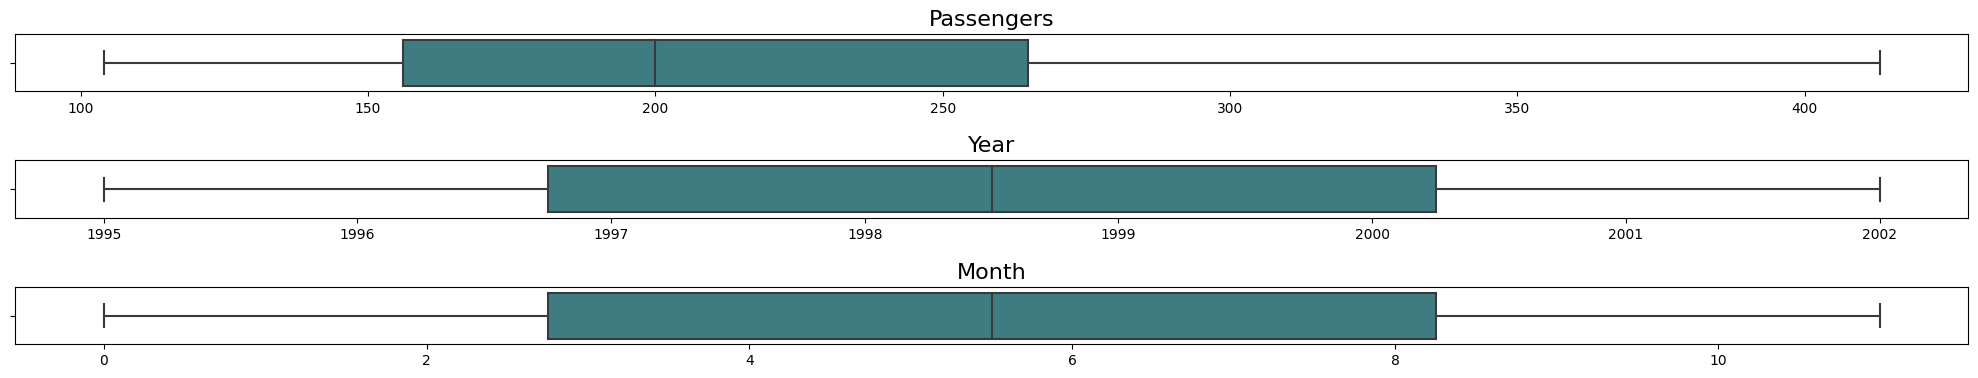

In [24]:
# display boxplots of Treated outliers with IQR

# Display boxplots
# Create subplots
fig, axes = plt.subplots(len(new_data.columns), 1, figsize=(20, 4), sharex=False, sharey=False)

# Loop through each variable and create boxplots
for i, variable in enumerate(new_data):
    sns.boxplot(x=variable, data=new_data, palette='crest', ax=axes[i])
    axes[i].set_title(f'{variable}', fontsize=16) 
    axes[i].set_xlabel('')  

plt.tight_layout(pad=1.5)
plt.show()


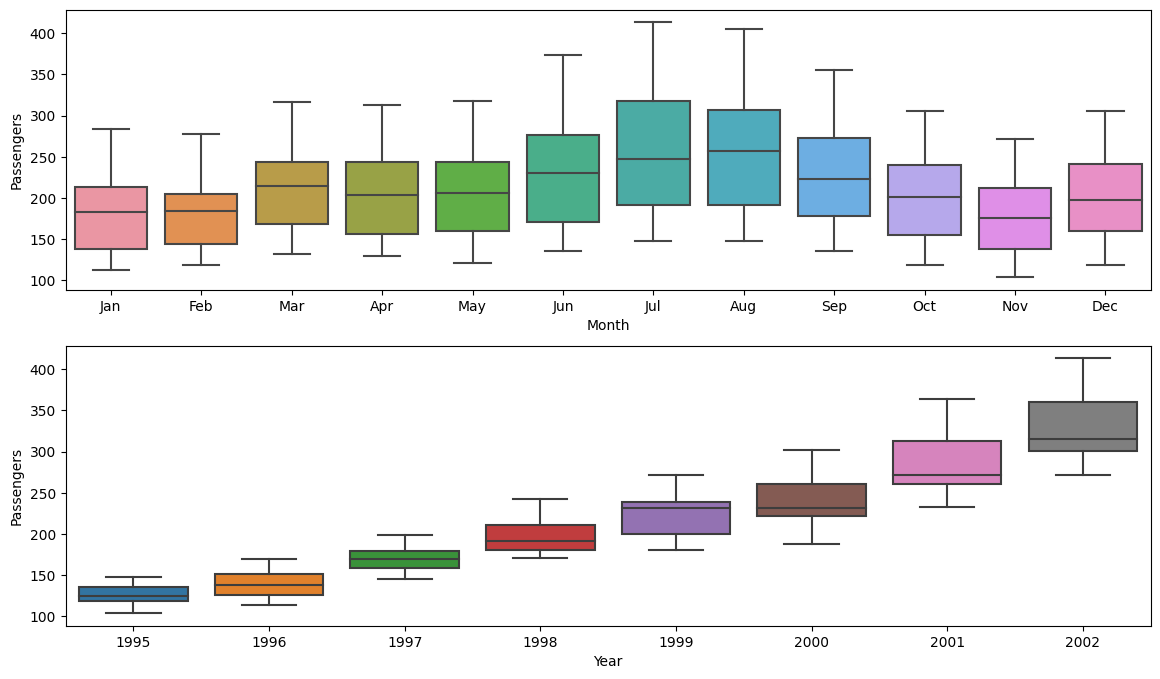

In [25]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=data)
plt.show()

### distribution plots

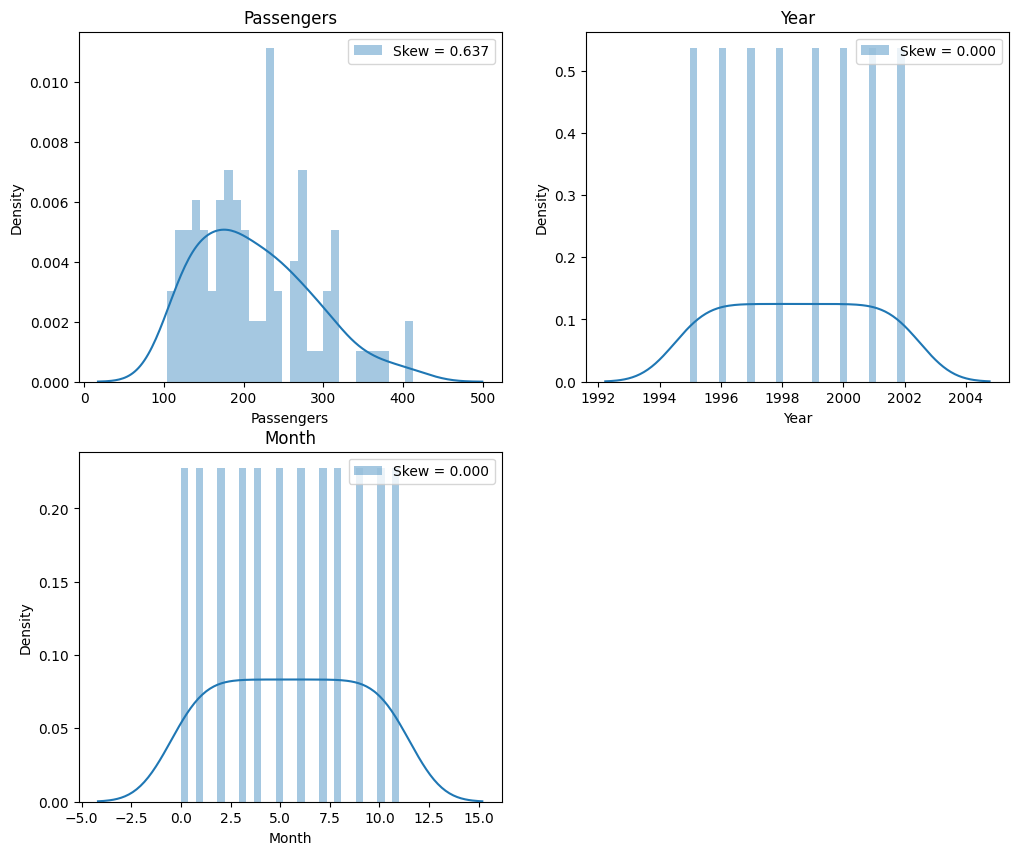

In [26]:
# distribution plots
subplots_per_row = 2
num_rows = (len(new_data.columns) + subplots_per_row - 1) // subplots_per_row
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(new_data.columns):
    ax = axes[i]
    skew = new_data[column].skew()
    sns.distplot(new_data[column], kde= True, label='Skew = %.3f' %(skew), bins=30, ax=ax)
    ax.legend(loc='best')
    ax.set_title(column)
    
# Hide any remaining empty subplots
for i in range(len(new_data.columns), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()


### Histogram & Probability Plot (Q-Q plot)

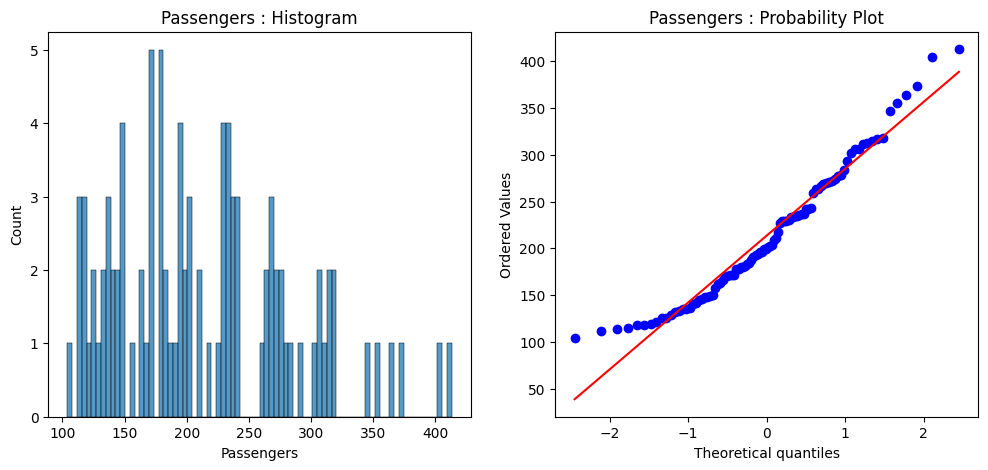

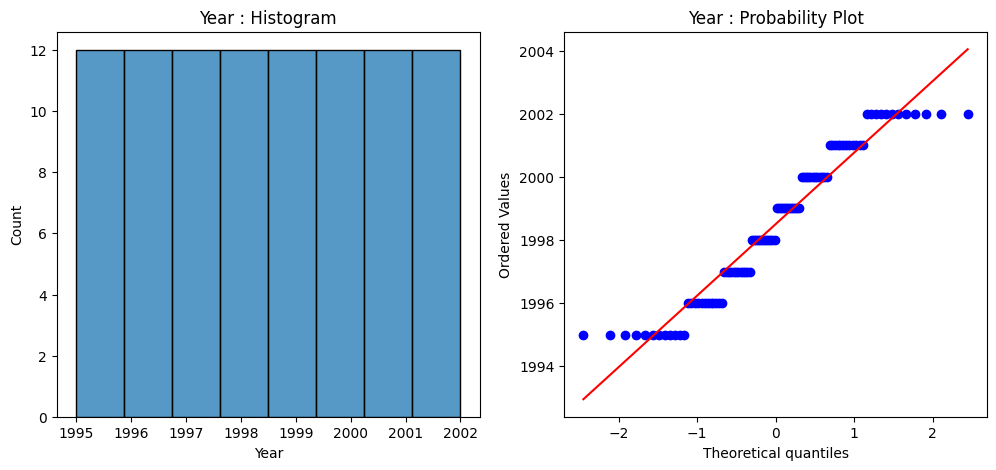

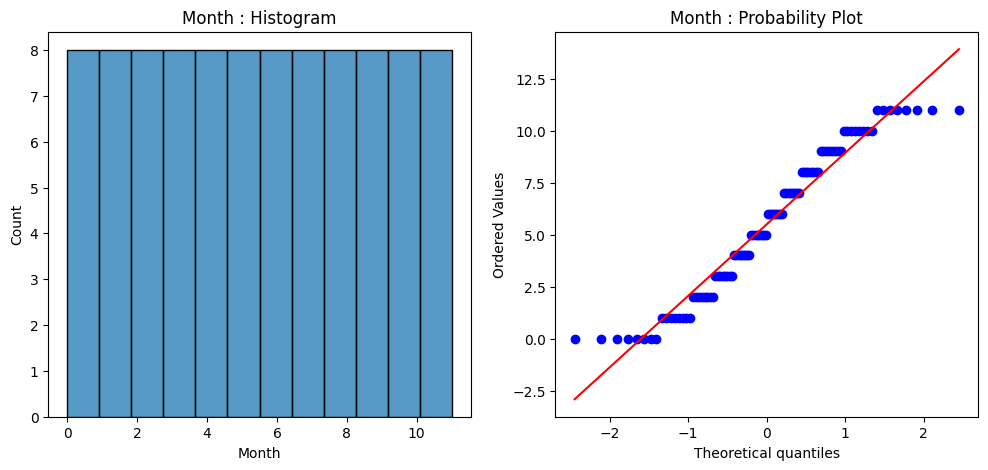

In [27]:
# Histogram & Probability Plot (Q-Q plot)
import pylab
import scipy.stats as stat

def plot_data(df, feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    # sns.barplot(x = df[feature].value_counts().index.tolist(), y = df[feature].value_counts().tolist())
    sns.histplot(df[feature], bins=len(df[feature].value_counts()))
    # df[feature].hist()
    plt.title(f'{feature} : Histogram')
    
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'{feature} : Probability Plot')

# Iterate through all columns
for column in new_data.columns:
    plot_data(new_data, column)
    plt.show()


# Time series plot

## Lag plot

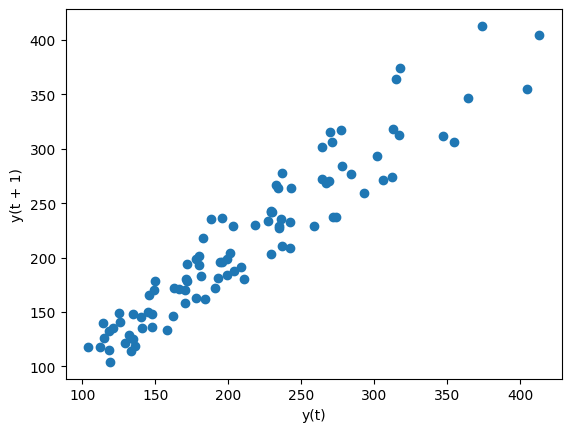

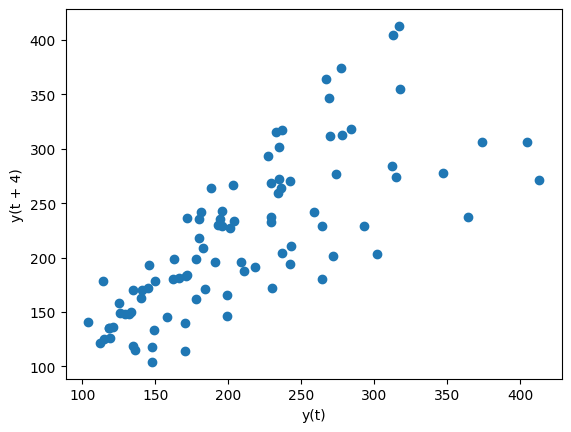

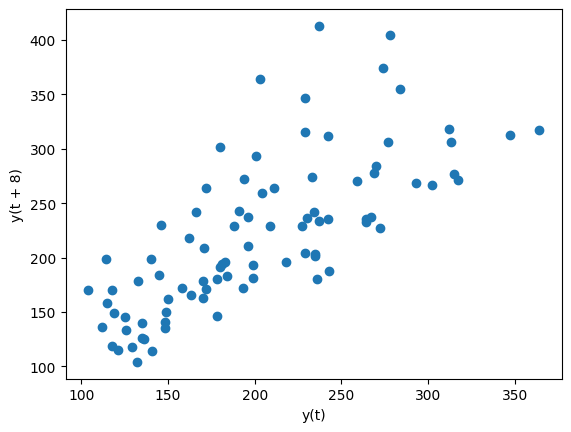

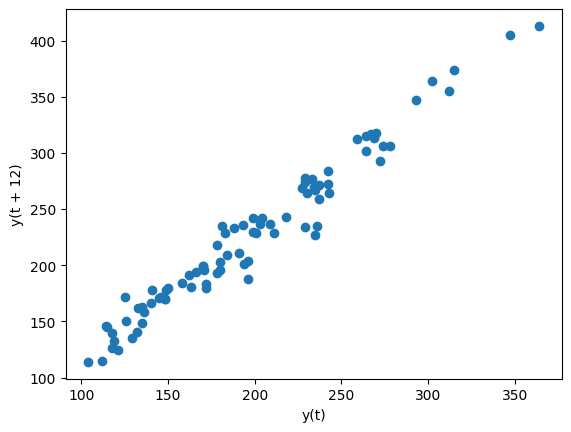

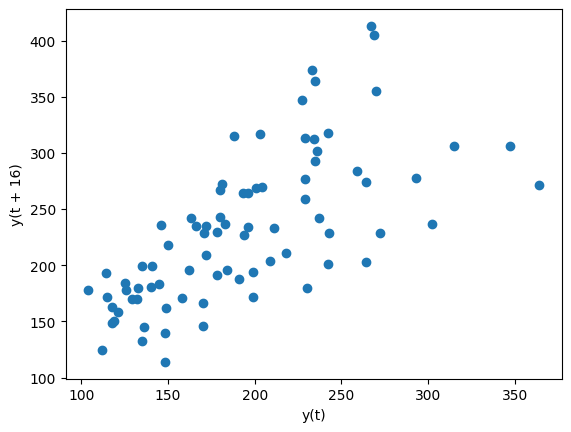

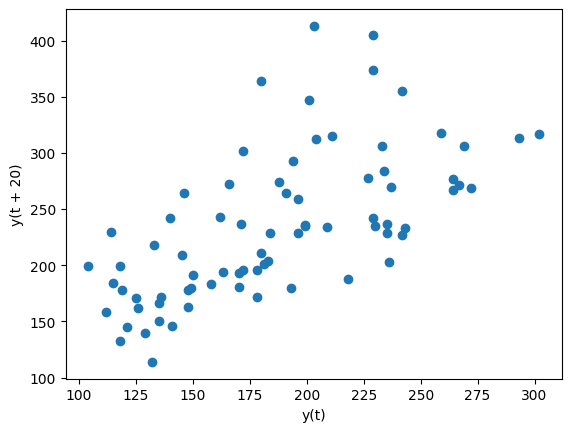

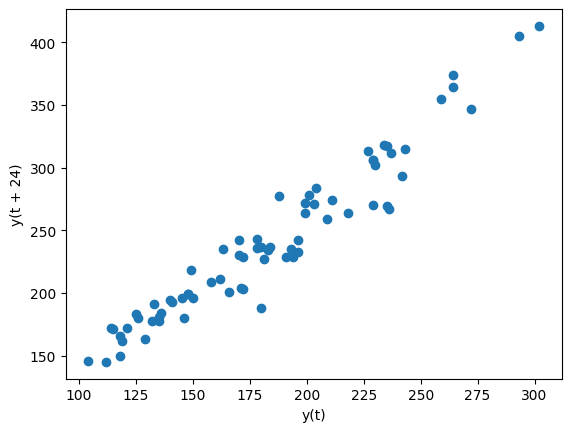

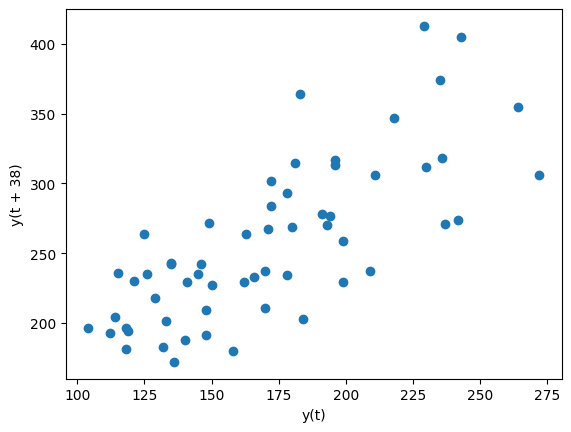

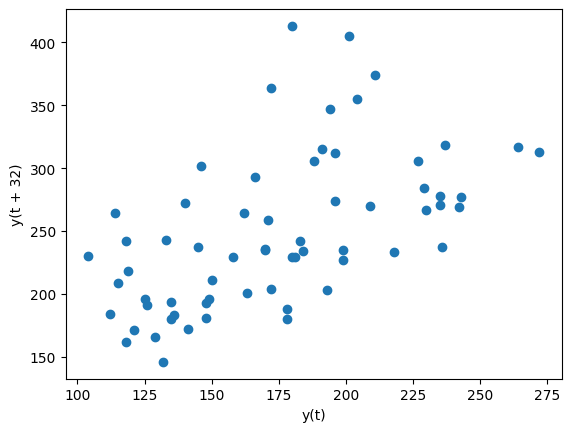

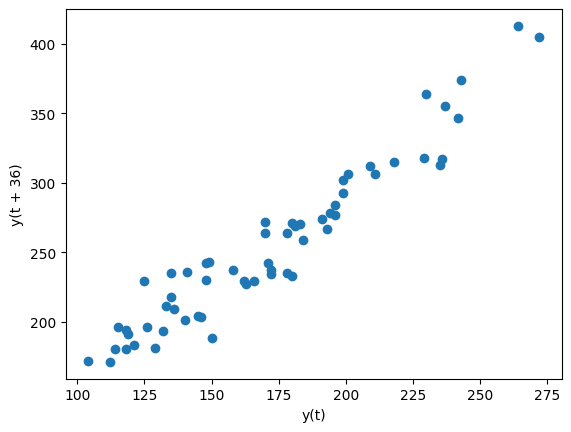

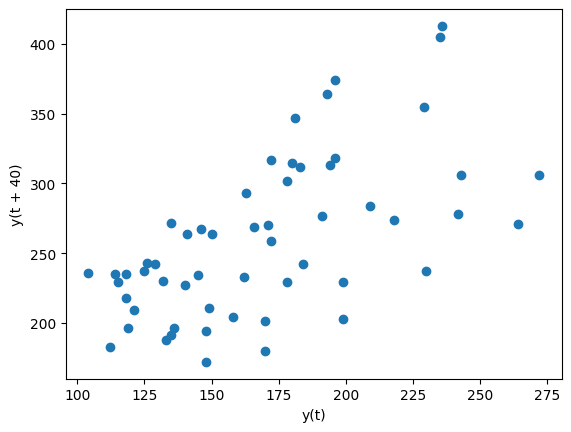

In [28]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(data.Passengers, lag=i)
    plt.show()

## The moving averages 

the moving averages of the passenger data for different window sizes

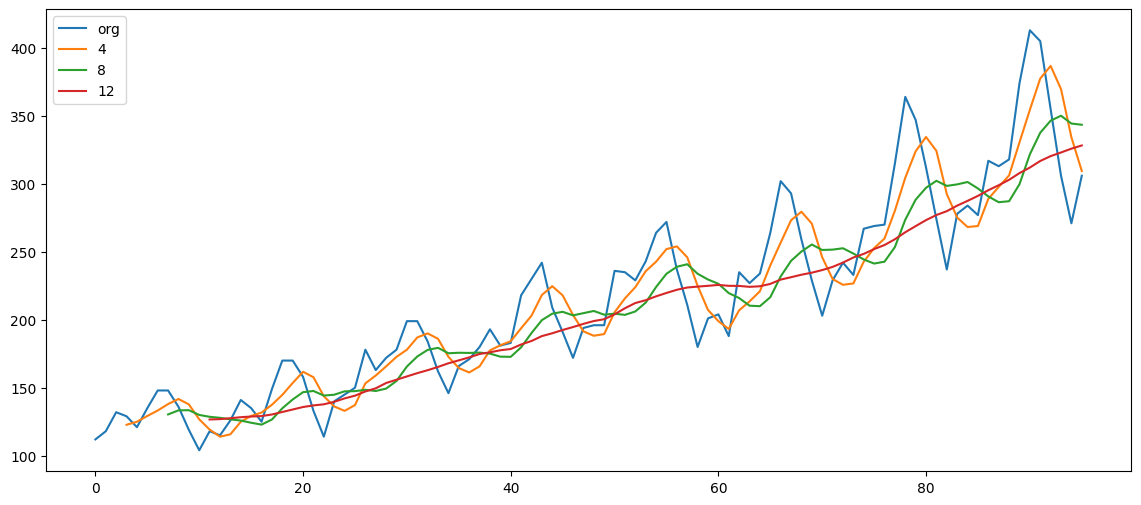

In [29]:
plt.figure(figsize=(14,6))
data.Passengers.plot(label="org")
for i in range(4,13,4):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

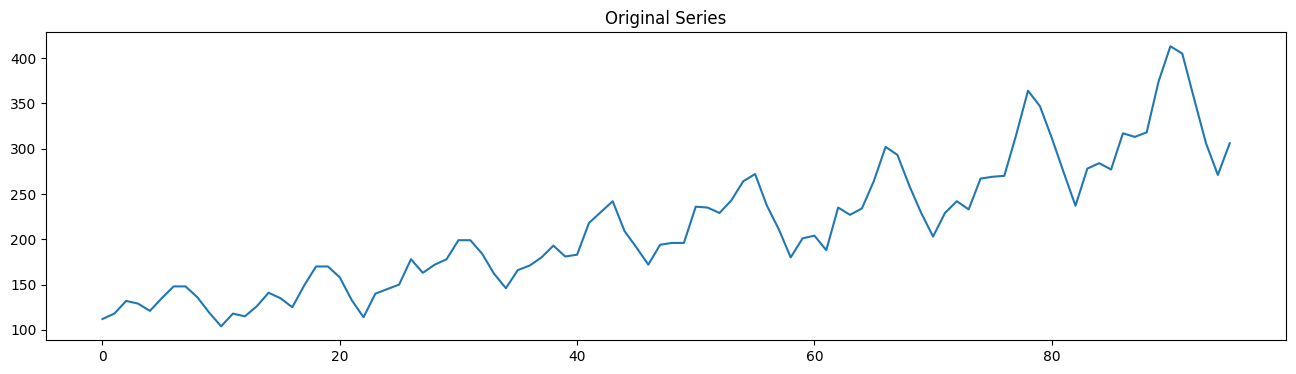

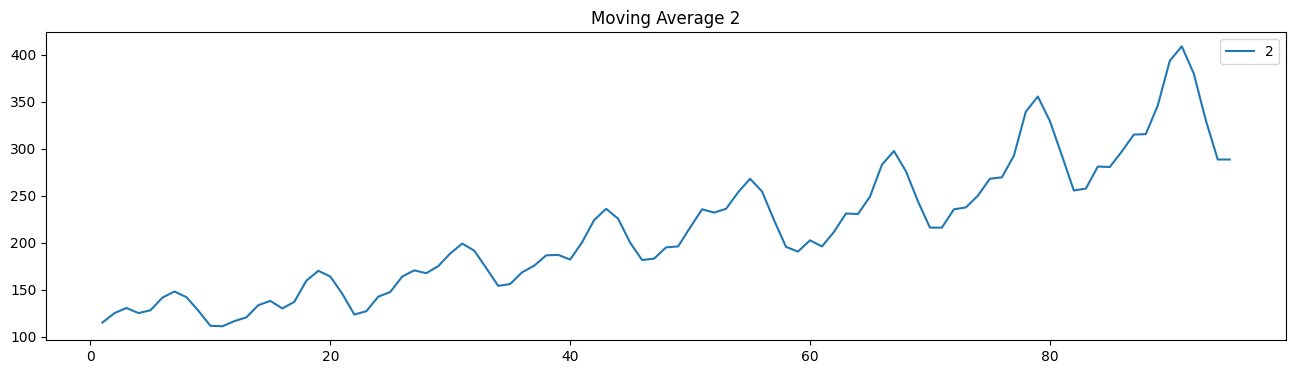

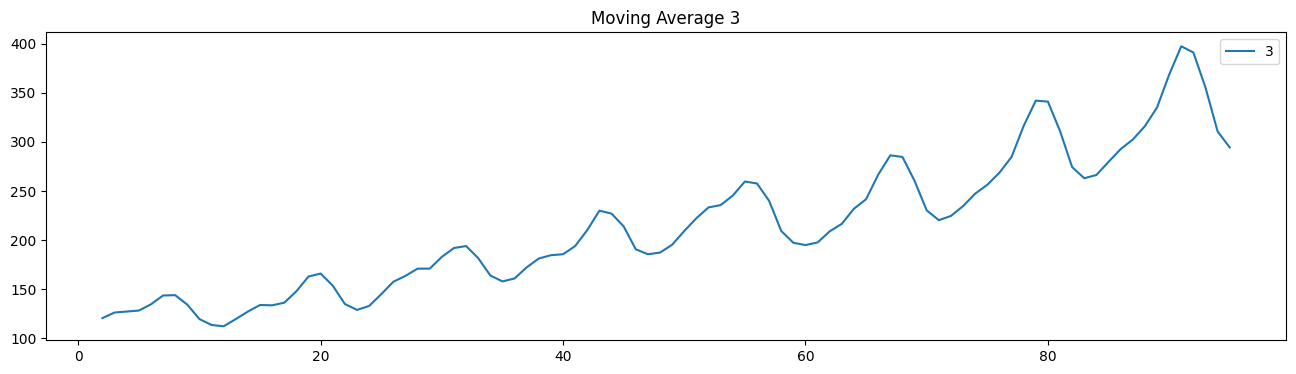

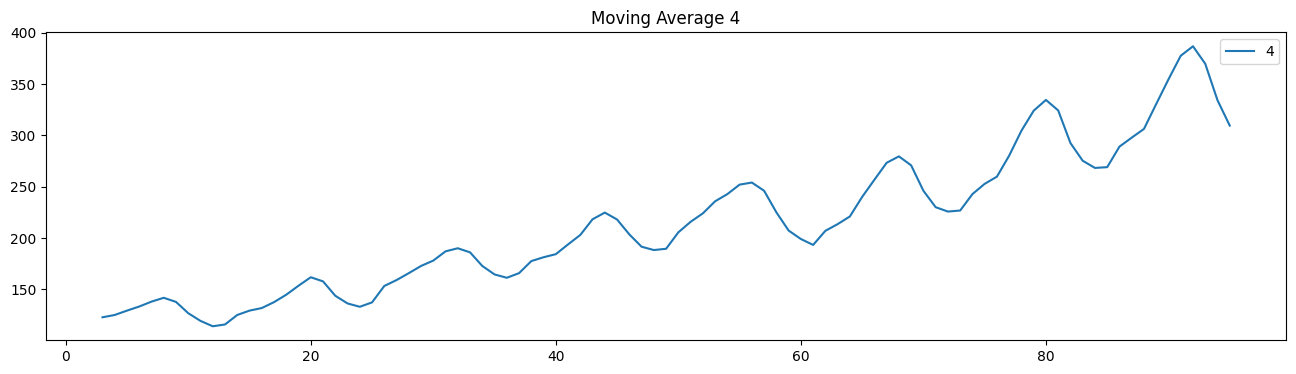

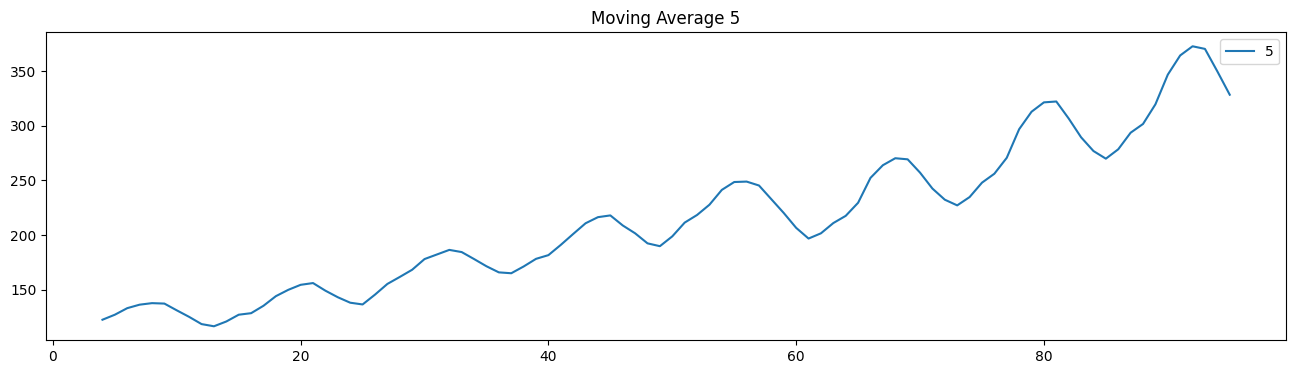

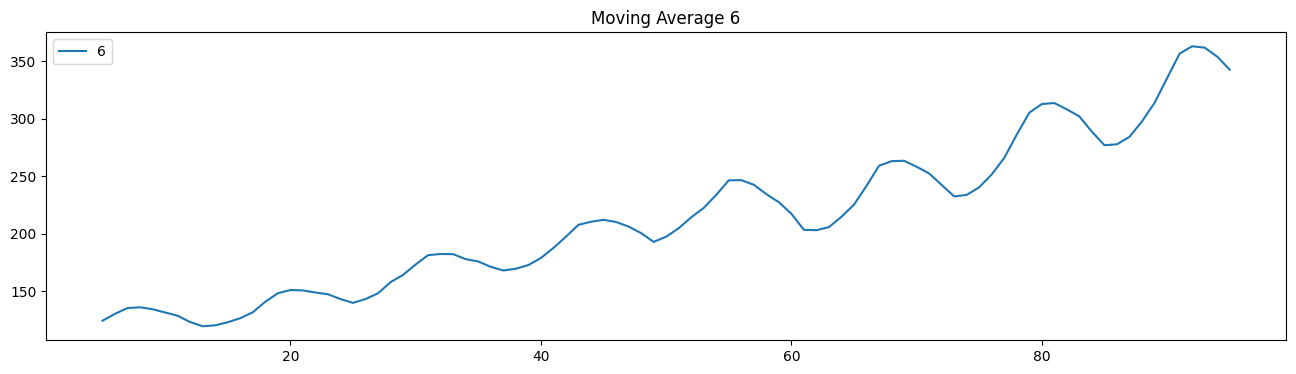

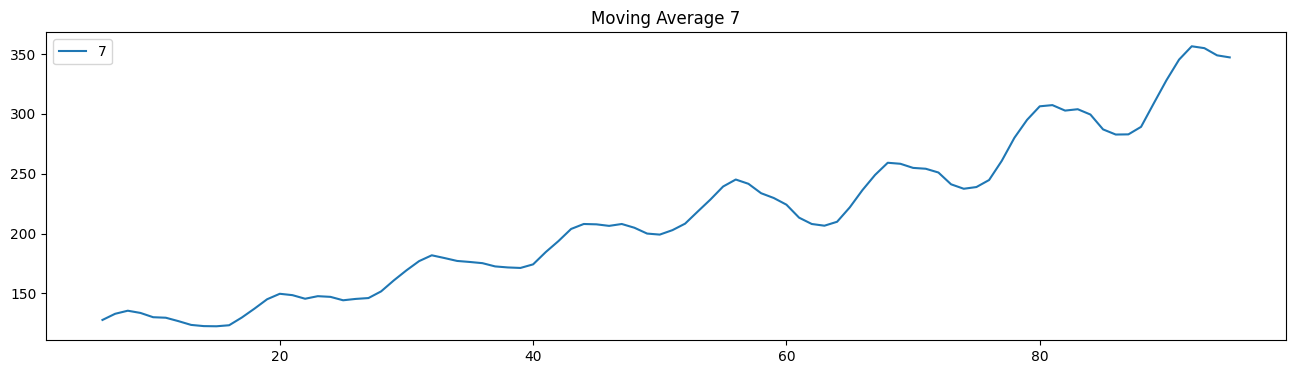

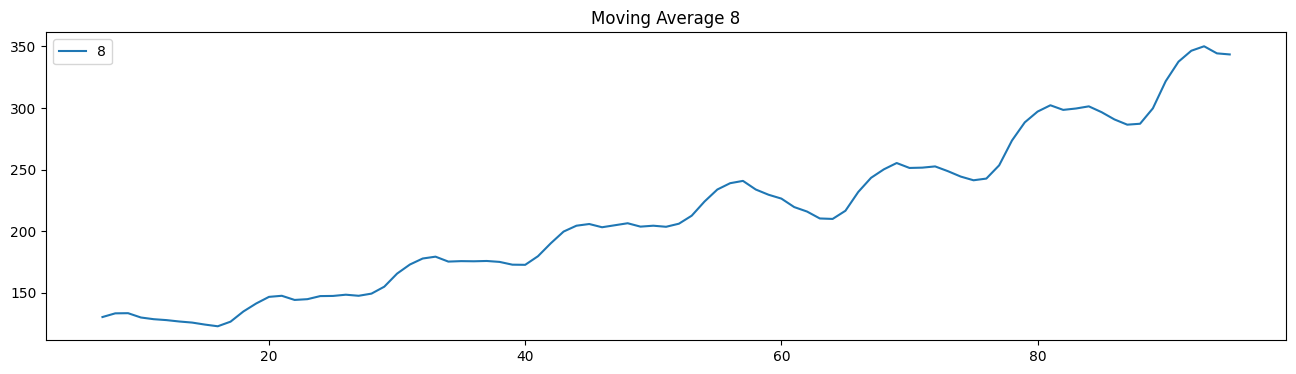

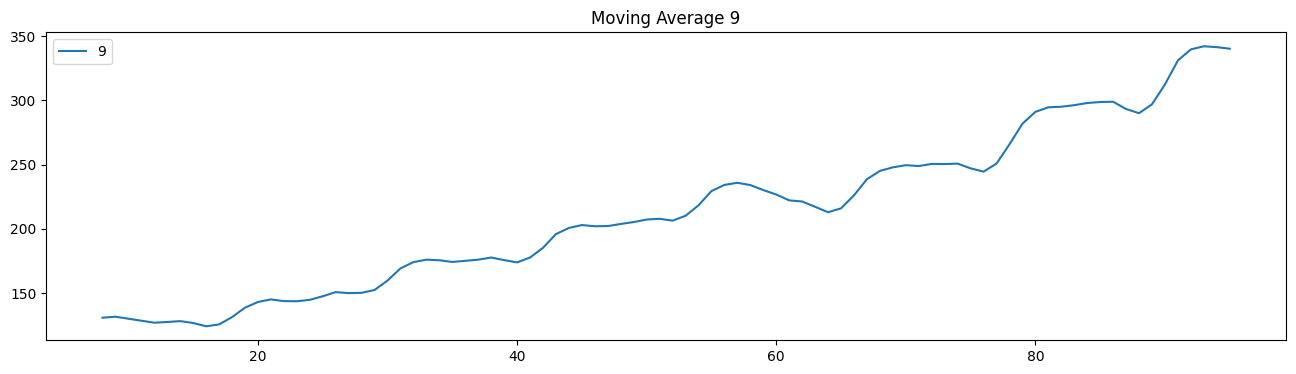

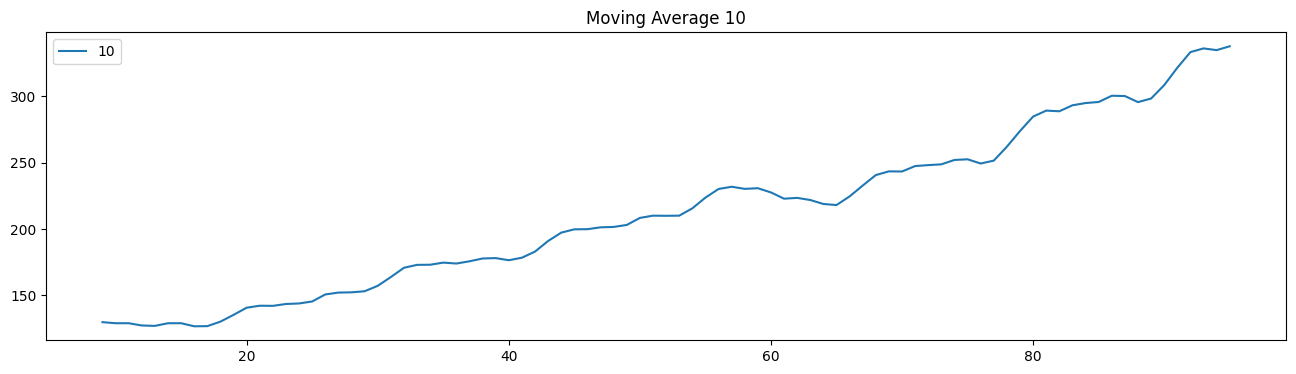

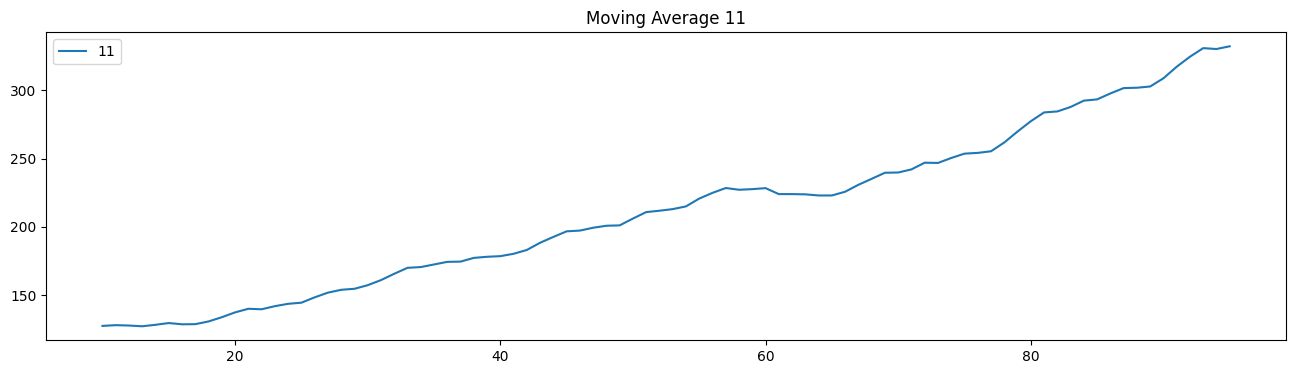

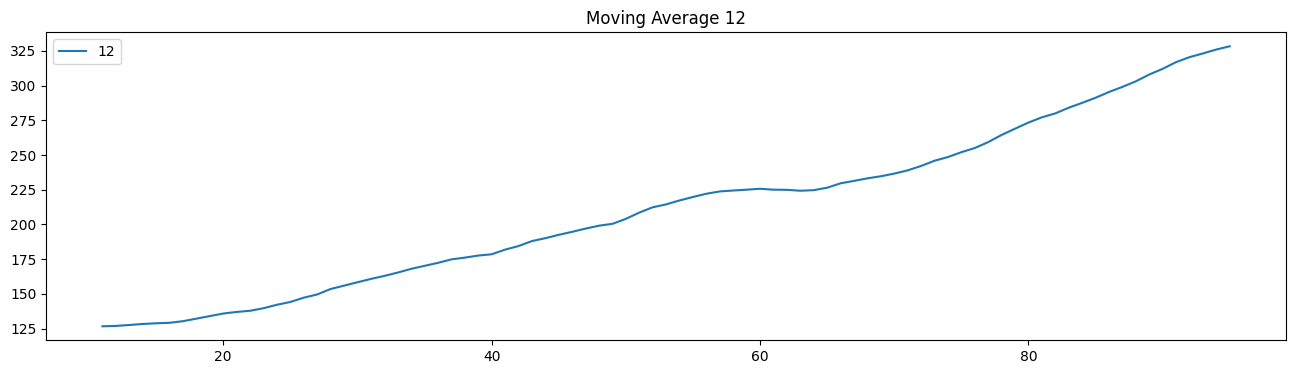

In [30]:
plt.figure(figsize=(16,4))
data.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13):
    plt.figure(figsize=(16,4))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()


## Time series decomposition plot

Decompose a time series into its components: trend, seasonality, and residual (or error)

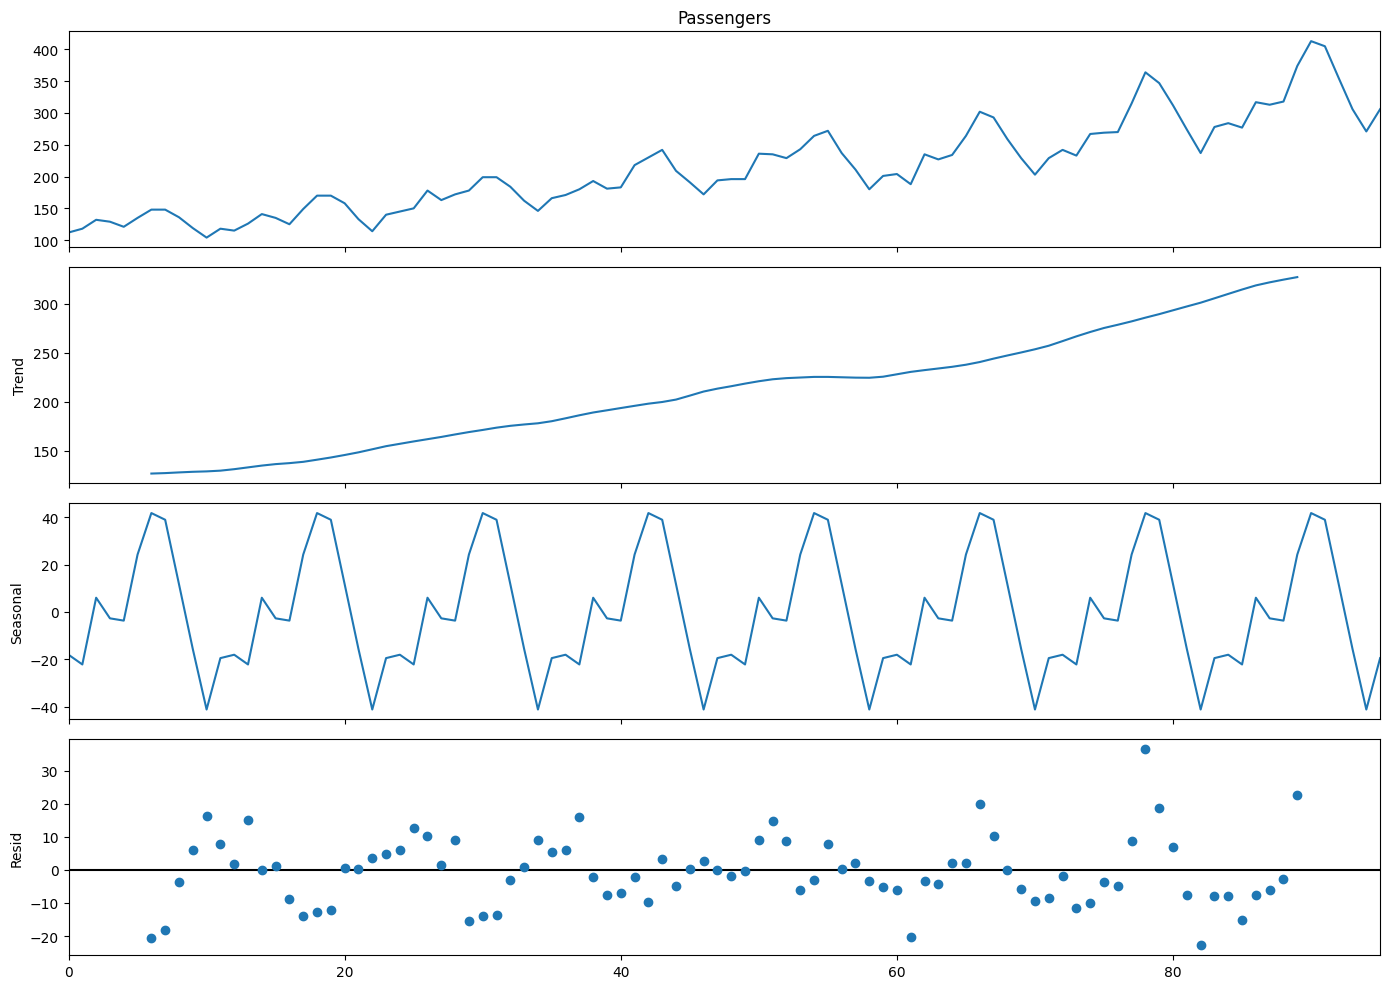

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts = seasonal_decompose(data.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts.plot()
    plt.show()

### Observation:-
1. **Observed** - Actual data
2. **Trend** - Increasing trend.
3. **Seasonal** -
    * Varies from +50 to -50 with the mean 0.
    * Each cycle represents each year trend.
    * The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is +50 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 50+100 = 150.
4. **Residual** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

### Additive Seasonal Decomposition

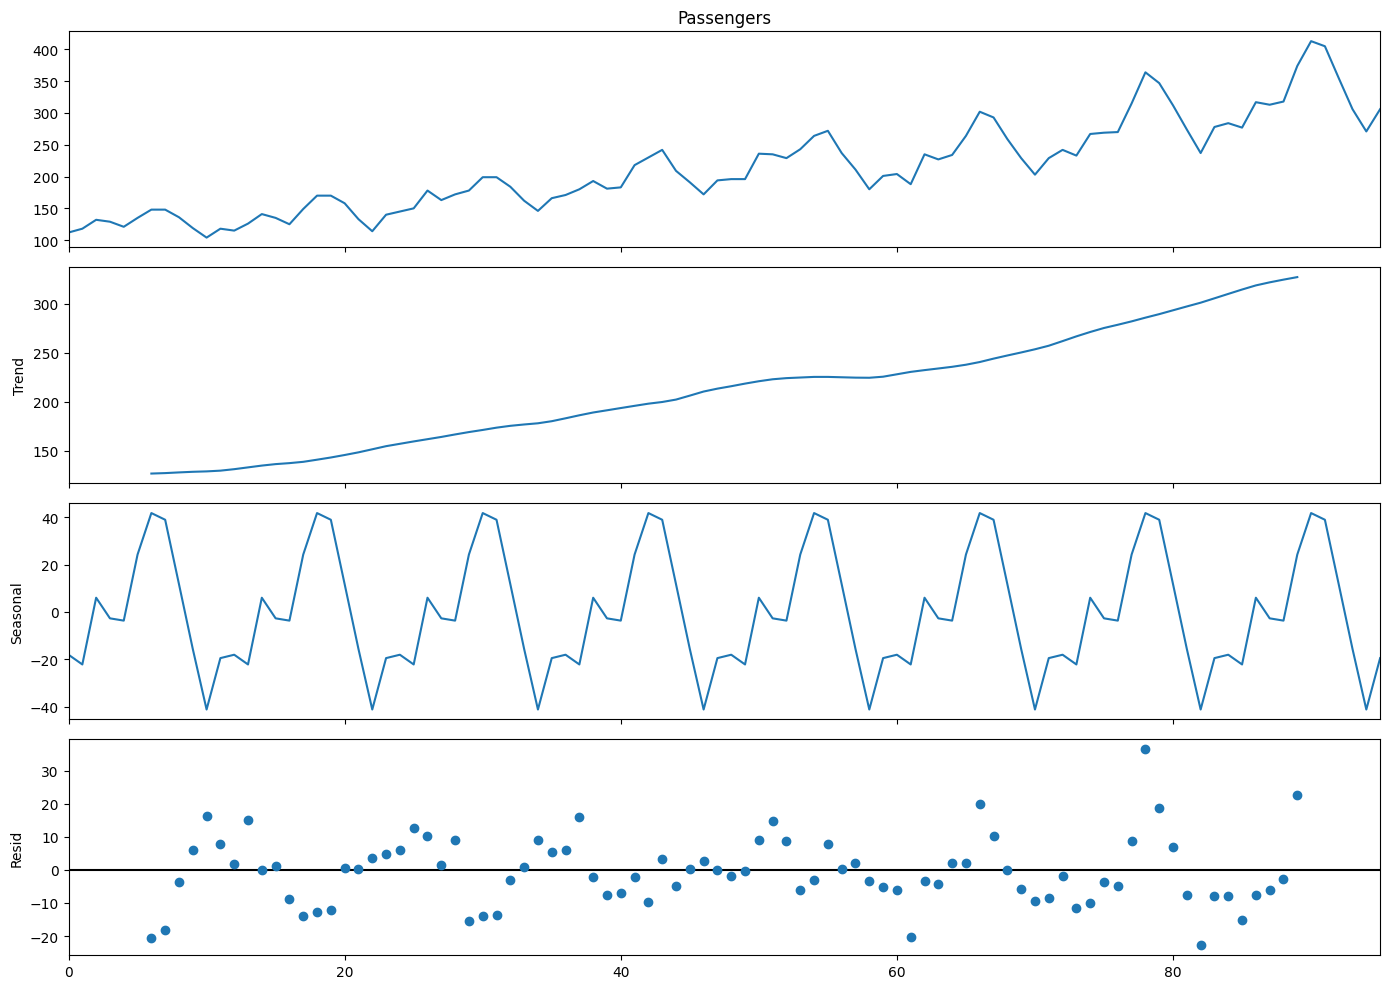

In [32]:
decompose_ts_add = seasonal_decompose(data.Passengers, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Multiplicative Seasonal Decomposition

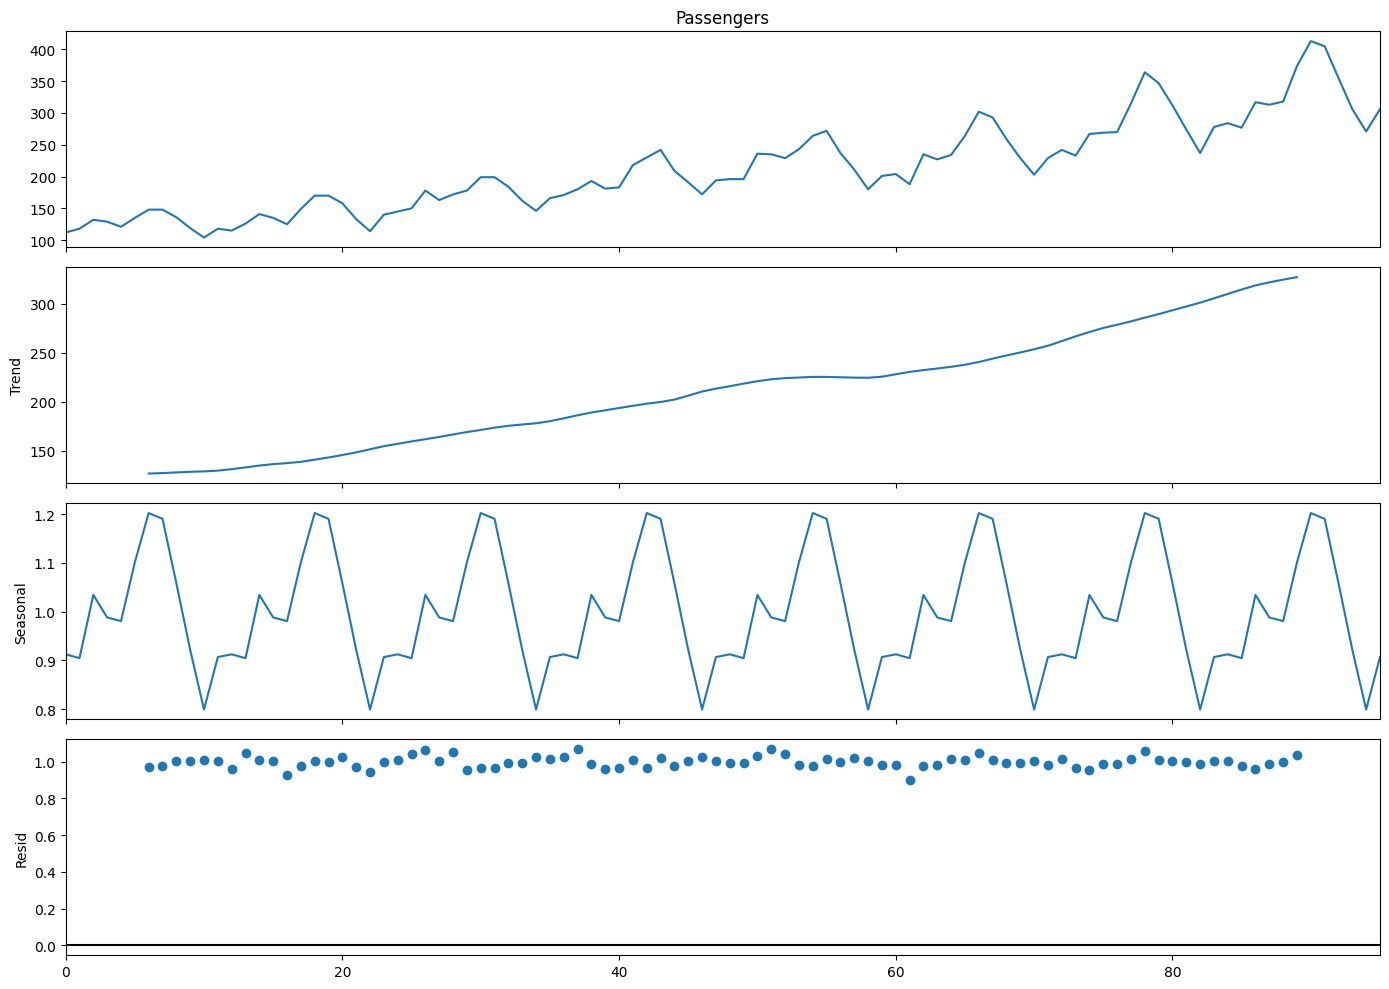

In [33]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Observation:-
**Seasonal** -

1. Varies from 0.8 to 1.2
2. The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is 1.2 and the trend value is 100. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.

## ACF (autocorrelation function) plots

 the autocorrelation between a time series and its lagged values

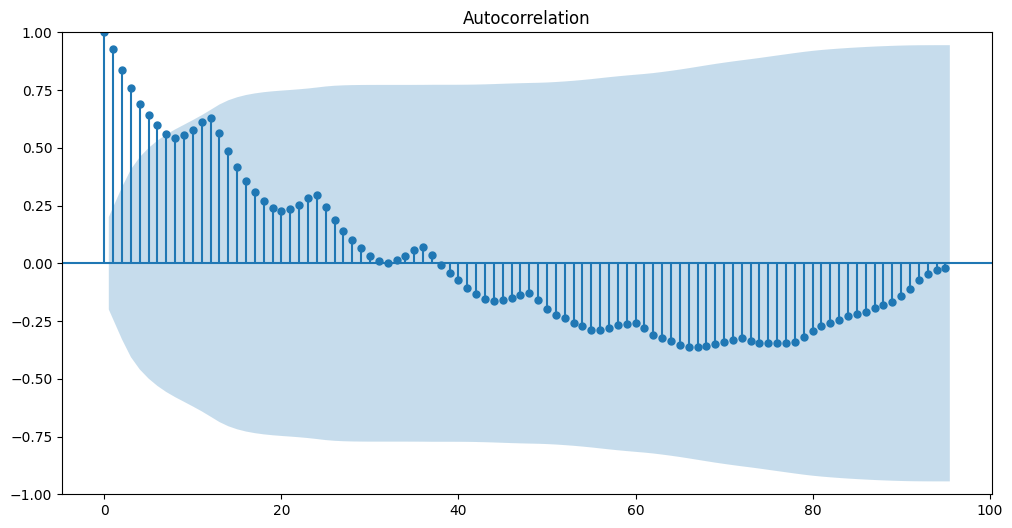

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(data.Passengers,lags=95)
    plt.show()

Autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation

## Partial Autocorrelation Function (PACF)

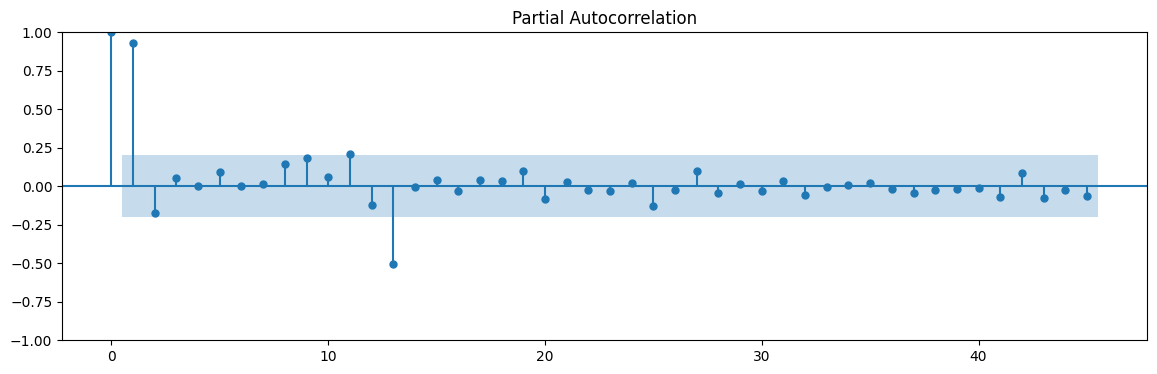

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(data.Passengers,lags=45)
    plt.show()

A partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

# Model Analysis

In [38]:
import datetime
data['m'] = range(1,(data.shape[0]+1))
data['m_square'] = np.power(data['m'],2)
data['log_Passengers']=np.log(data['Passengers'])
data

,Date,Passengers,Month,Year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [39]:
Train = data.head(84)
Test = data.tail(12)

#### We are going to forecat for the last year2002.
#### Last 12 records contain 2002 data.

In [40]:
train_data = Train[['Date', 'Passengers']].copy().reset_index(drop=True)
train_data.set_index('Date', inplace=True)
test_data = Test[['Date', 'Passengers']].copy().reset_index(drop=True)
test_data.set_index('Date', inplace=True)
print('Train:',train_data.index.min(),train_data.index.max(),'\n', 'Test:',test_data.index.min(),test_data.index.max())
train_data

Train: 1995-01-01 00:00:00 2001-12-01 00:00:00 
 Test: 2002-01-01 00:00:00 2002-12-01 00:00:00


,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


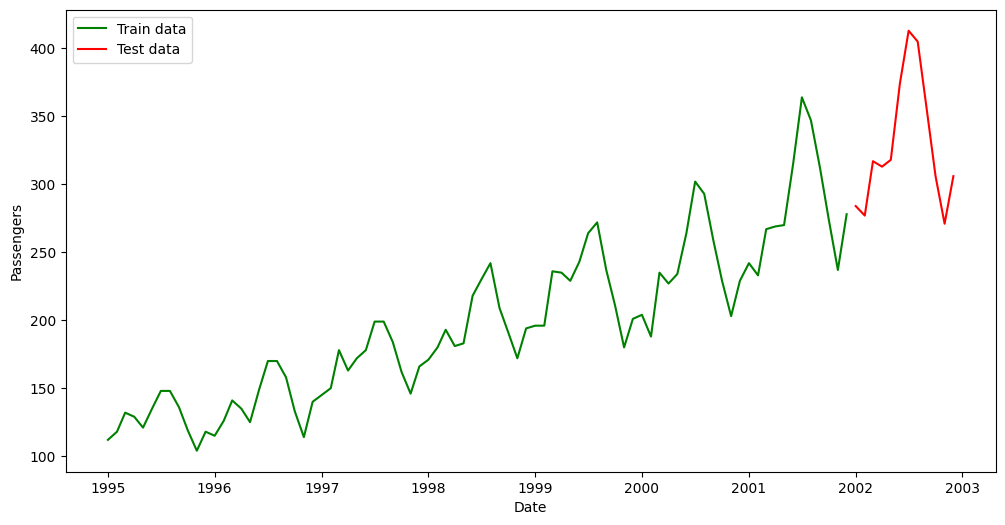

In [41]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

# Ordinary Square Model

## Linear Model

In [42]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480271

## Exponential model

In [43]:
Exp = smf.ols('log_Passengers~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315635

## Qadratic model

In [44]:
Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

## Additive seasonality

In [45]:
df = pd.get_dummies(data['Month'],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df = pd.concat([data[['Passengers', 'Year','m','log_Passengers']], df], axis=1)
Train = df.head(84)
Test = df.tail(12)
df

,Passengers,Year,m,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112,1995,1,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,118,1995,2,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,132,1995,3,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,129,1995,4,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,121,1995,5,4.795791,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002,92,6.003887,False,True,False,False,False,False,False,False,False,False,False,False
92,355,2002,93,5.872118,False,False,False,False,False,False,False,False,False,False,False,True
93,306,2002,94,5.723585,False,False,False,False,False,False,False,False,False,False,True,False
94,271,2002,95,5.602119,False,False,False,False,False,False,False,False,False,True,False,False


In [46]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [47]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 10.519172544322252


## Forcasting

In [48]:
data_1 = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data_1, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [49]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["m"] = np.arange(1,13)   
forecast1["m_squared"] = forecast1["m"]*forecast1["m"] 
print("\nAfter Dummy, M and M-Square\n\n",forecast1.head())


After Dummy, M and M-Square

          Date Months    Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar  \
0  2003-01-01    Jan  False  False  False  False   True  False  False  False   
1  2003-02-01    Feb  False  False  False   True  False  False  False  False   
2  2003-03-01    Mar  False  False  False  False  False  False  False   True   
3  2003-04-01    Apr   True  False  False  False  False  False  False  False   
4   2003-5-01    May  False  False  False  False  False  False  False  False   

     May    Nov    Oct    Sep  m  m_squared  
0  False  False  False  False  1          1  
1  False  False  False  False  2          4  
2  False  False  False  False  3          9  
3  False  False  False  False  4         16  
4   True  False  False  False  5         25  


In [50]:
model_full = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,m,m_squared,Forecasted_log,Forecasted_Passengers
0,2003-01-01,Jan,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.692963,109.176148
1,2003-02-01,Feb,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.703487,110.331245
2,2003-03-01,Mar,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.846666,127.315234
3,2003-04-01,Apr,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.813814,123.200587
4,2003-5-01,May,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.807291,122.399578
5,2003-06-01,Jun,False,False,False,False,False,False,True,False,False,False,False,False,6,36,4.931133,138.536397
6,2003-07-01,Jul,False,False,False,False,False,True,False,False,False,False,False,False,7,49,5.037387,154.066959
7,2003-08-01,Aug,False,True,False,False,False,False,False,False,False,False,False,False,8,64,5.035271,153.741209
8,2003-09-01,Sep,False,False,False,False,False,False,False,False,False,False,False,True,9,81,4.925032,137.693733
9,2003-10-01,Oct,False,False,False,False,False,False,False,False,False,False,True,False,10,100,4.794920,120.894736


## Exponential Methods

### MAPE

In [51]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method
### Using Forecast Attribute

In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(12)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 14.235433154627307 
 Train Root Mean Squared Error = 21.247969155479208 
 Test Root Mean Squared Error  = 68.0067403134932


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


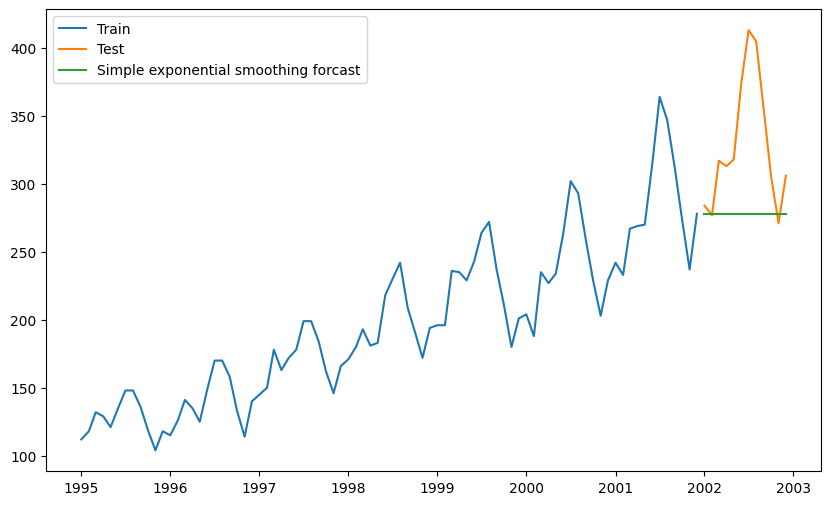

In [53]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. No seasonality captures.
2. Most recent observation gets higher weightages than the older ones for forecasting.

### Holt method (Double Exponential)
#### Captures both Level and Trend .

In [54]:
from statsmodels.tsa.holtwinters import Holt
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(12)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 11.188923772868717 
 Train Root Mean Squared Error = 21.445575936161415 
 Test Root Mean Squared Error  = 52.92194971240321


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


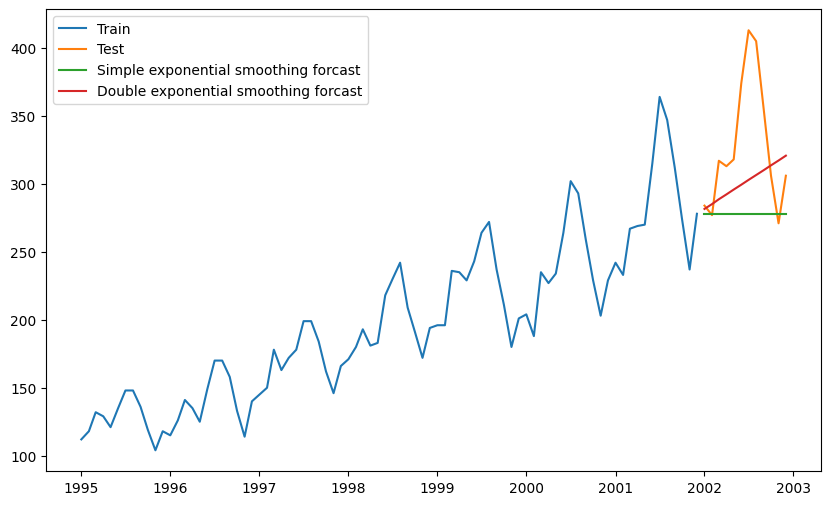

In [55]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that we are able to capture the trend of the data.
2. We were not able to capture the seasonality.

### Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
#### Captures Level, Trend and Seasonality.

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(12)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Passengers))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Passengers)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 5.730704946852847 
 Train Root Mean Squared Error = 9.207292102509339 
 Test Root Mean Squared Error  = 29.590449653925013


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


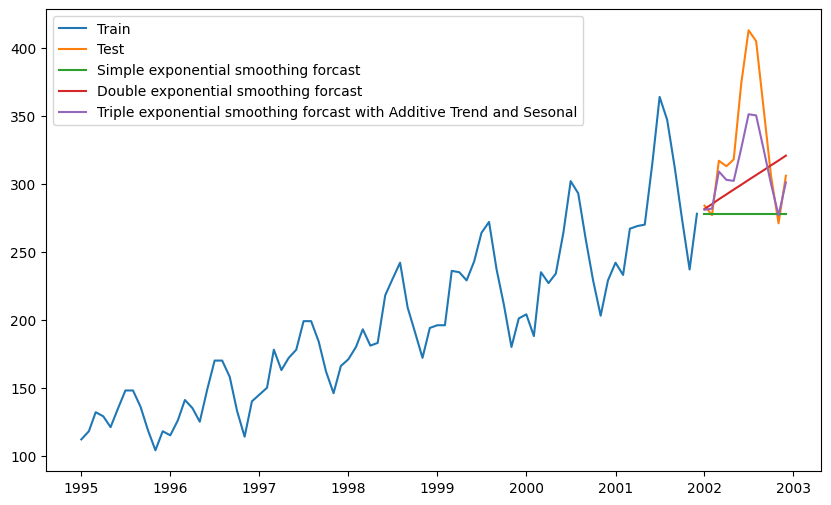

In [57]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
1. It captures the trend, which we can see that the forecasted values are lower level than the test level.
2. It also captures the seasonality.
3. The peak of the forecasted value is lower than the actual.

### Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [58]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(12)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Passengers))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Passengers)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 2.821093186644687 
 Train Root Mean Squared Error = 6.871559069159002 
 Test Root Mean Squared Error  = 12.920904962268803


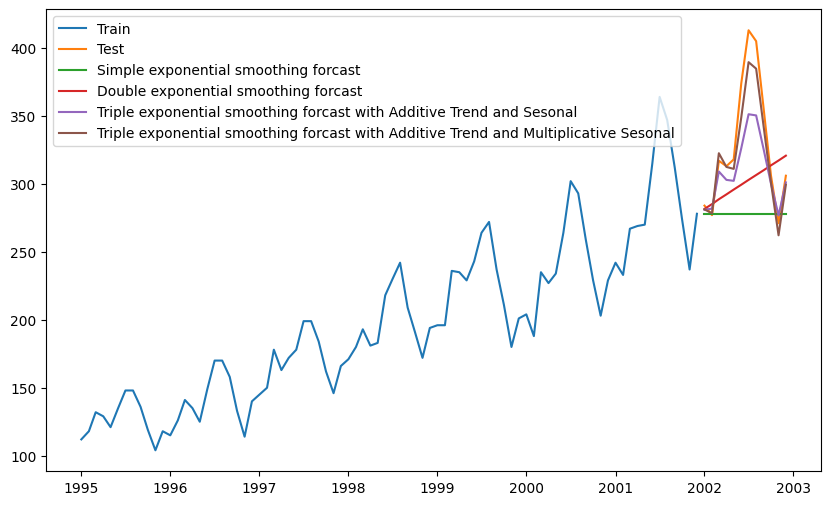

In [59]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
1. We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

### Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [60]:
texp_ad_mul_model = ExponentialSmoothing(train_data,seasonal="add",trend="mul",
                    seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(12)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Passengers))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 2.3266567386683144 
 Train Root Mean Squared Error = 12.711126425077715 
 Test Root Mean Squared Error  = 11.242795680976029


c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


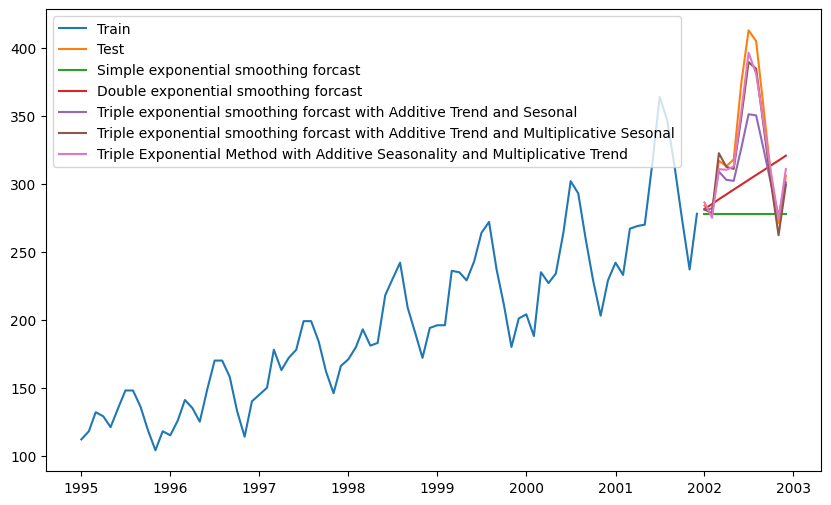

In [61]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

### Observation
1. It captures the trend, which we can see that the forecasted values are higher level than the test level.
2. It also captures the seasonality.
3. The peak of the forecasted value is higher than the actual.

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [62]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(12)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Passengers))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

c:\Users\AFSAL KP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 1.939523551988522 
 Train Root Mean Squared Error = 6.80269660541673 
 Test Root Mean Squared Error  = 7.756832882982536


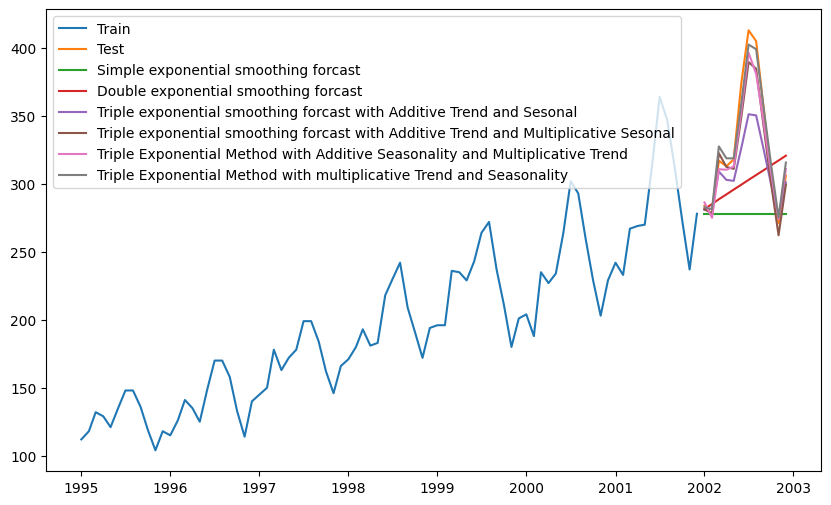

In [63]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

### Comparing the results 

In [64]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation = pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_Mul,6.802697,1.939524,7.756833
1,Triple_Exp_Add_Mul,12.711126,2.326657,11.242796
2,Triple_Exp_Mul_Add,6.871559,2.821093,12.920905
3,Triple_Exp_Add,9.207292,5.730705,29.590450
4,Double_Exp,21.445576,11.188924,52.921950
5,Simple_Exp,21.247969,14.235433,68.006740


### Visualizing Models Performance

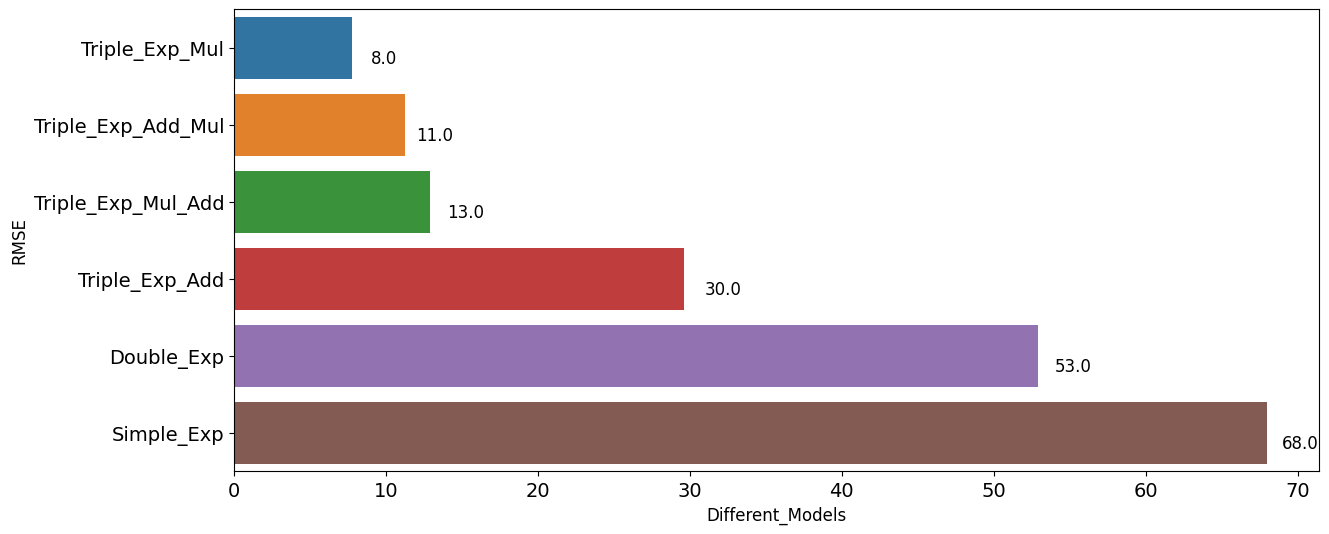

In [65]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x= 'Test_RMSE_Values', y= 'Models', data= table_evaluation, ax= axe)
axe.set_xlabel('Different_Models', size=12)
axe.set_ylabel('RMSE', size=12)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 12)
plt.show()

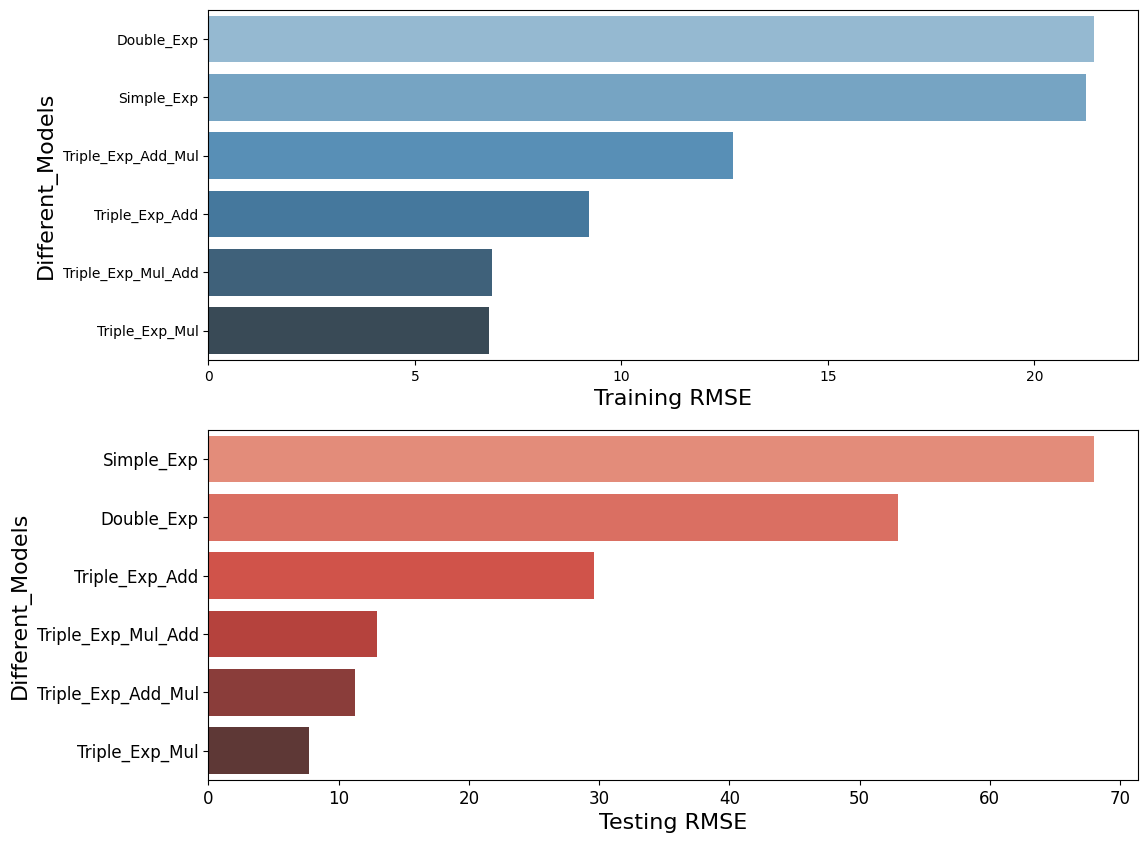

In [66]:
f, axes = plt.subplots(2,1, figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

## Autoregressive Integrated Moving Averages (ARIMA)

### Stationary vs Non-stationary Time Series
### Test of Stationarity
#### As we have yearly data the window size for moving average is equal to 12

In [67]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

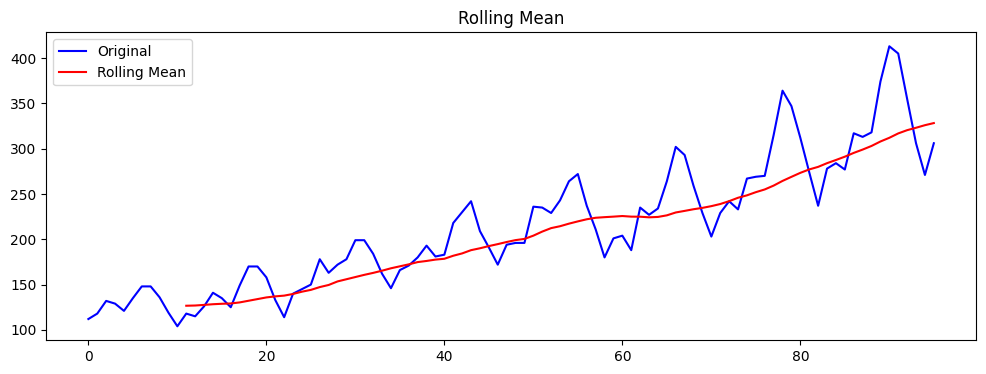

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [68]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Passengers'] = data[['Passengers']]
test_stationarity(sales)

In [69]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [70]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


### Feature Scaling (Transformations)
### 1. Square Root Transform

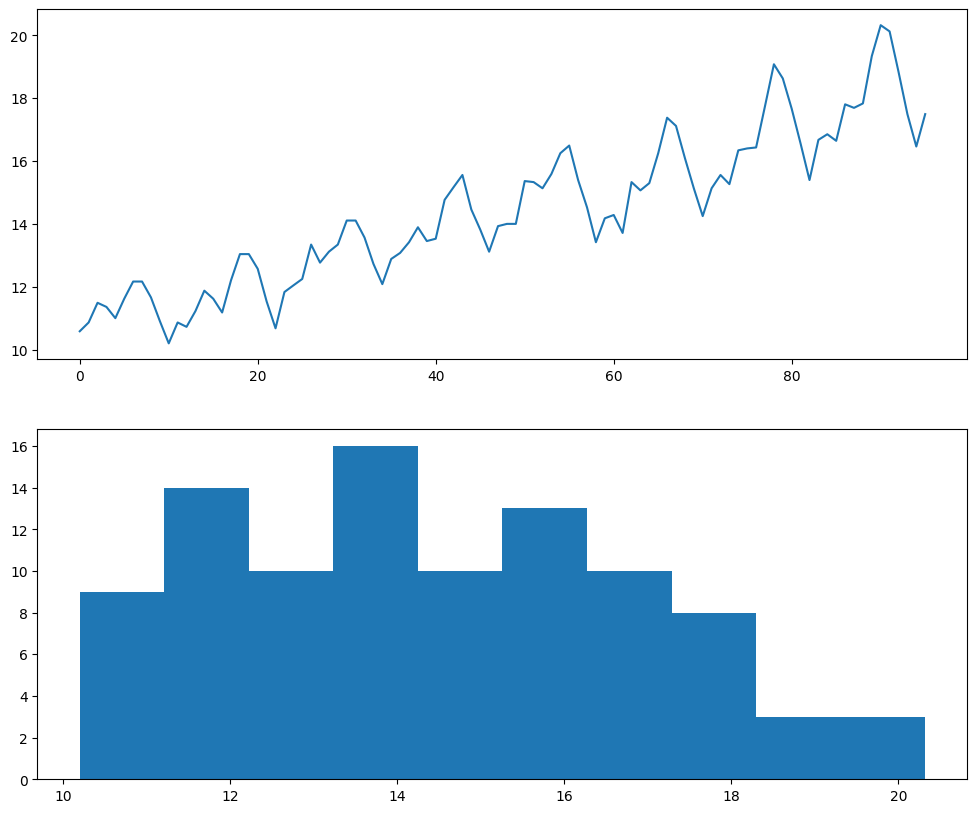

In [71]:
square_root= pd.DataFrame()
square_root = data[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

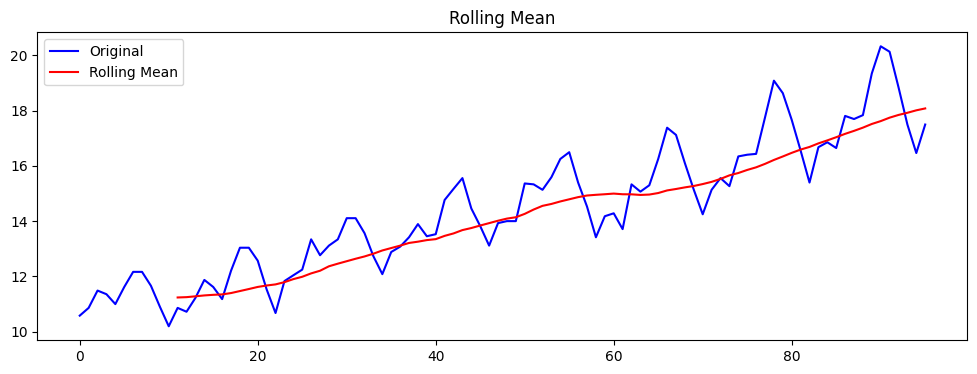

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [72]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)
adf_test(square_root)

### 2. Log Transform

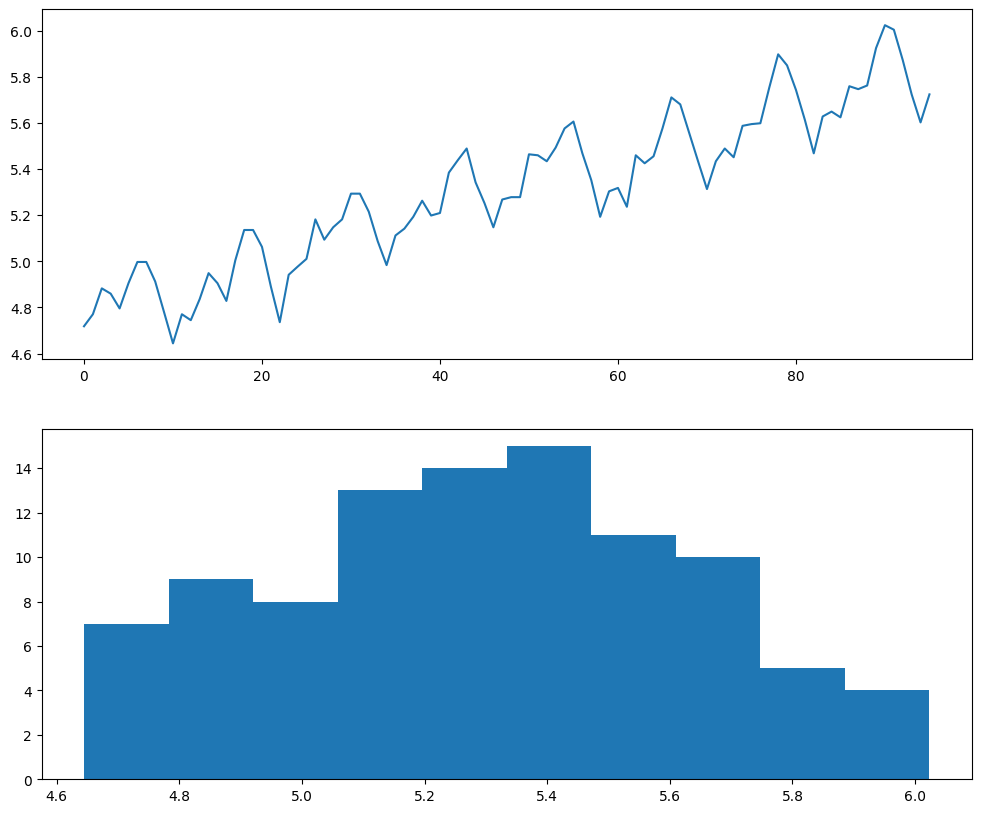

In [73]:
log = pd.DataFrame()
log = data[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()


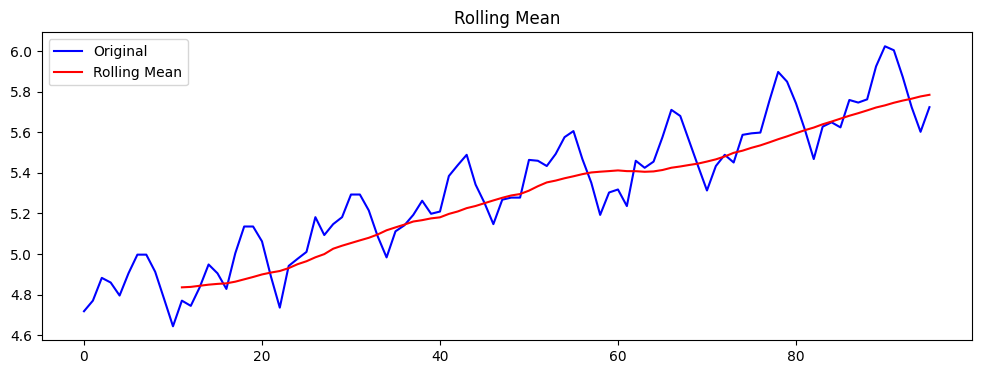

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [74]:
plt.figure(figsize=(12,4))
test_stationarity(log)
adf_test(log)

#### Hence, the Time series data is Non-Stationary

### 3. Converting Non-Stationary Time Series into Stationary
### Differencing

In [75]:
data_M= data[['Date', 'Passengers']].copy()
data_M.set_index('Date', inplace=True)
data_M

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


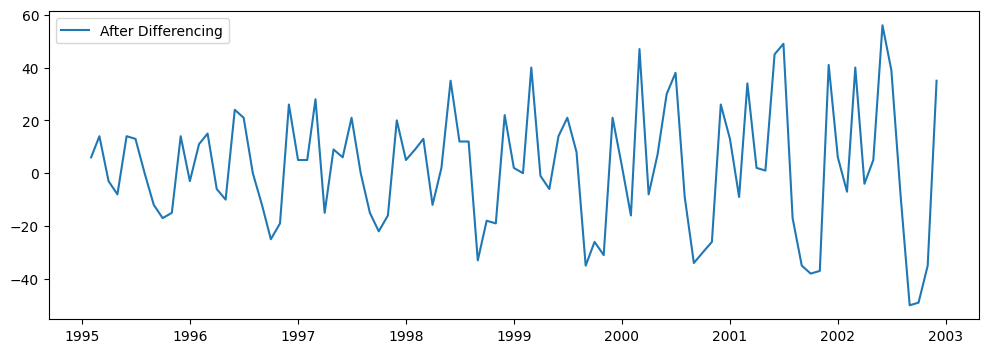

In [76]:
differencing = data_M - data_M.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

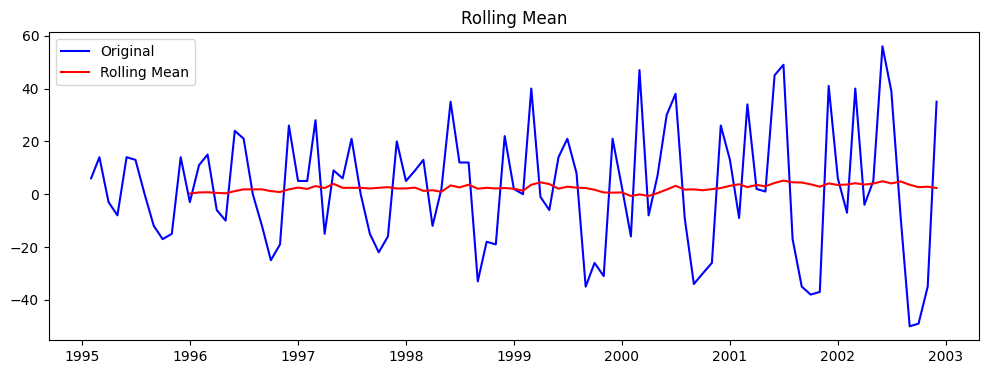

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [77]:
plt.figure(figsize=(12,4))
test_stationarity(differencing)
adf_test(differencing)

### Seasonal Differencing

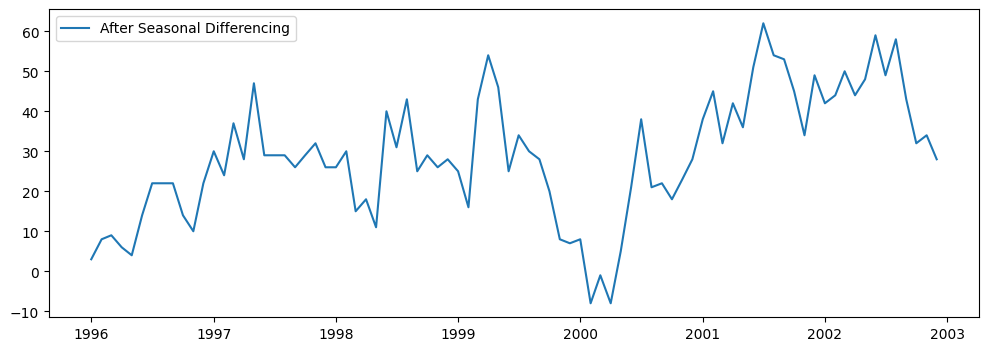

In [78]:
seasonal_differencing = data_M - data_M.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

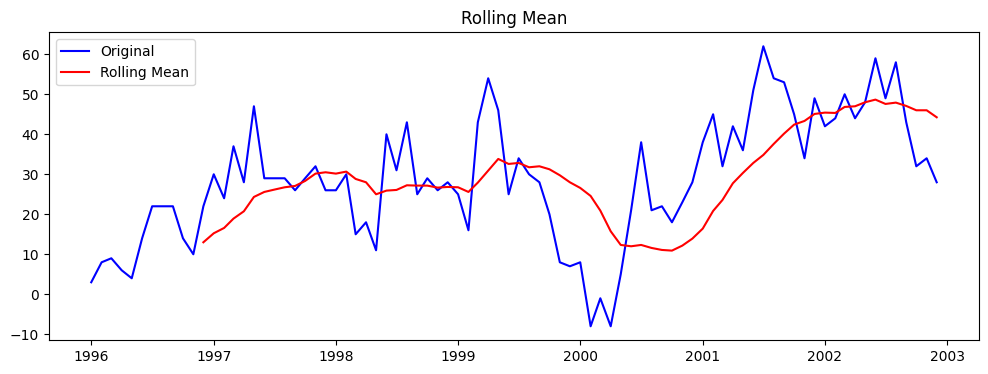

Results of Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [79]:
plt.figure(figsize=(12,4))
test_stationarity(seasonal_differencing)
adf_test(seasonal_differencing)

### Transformation

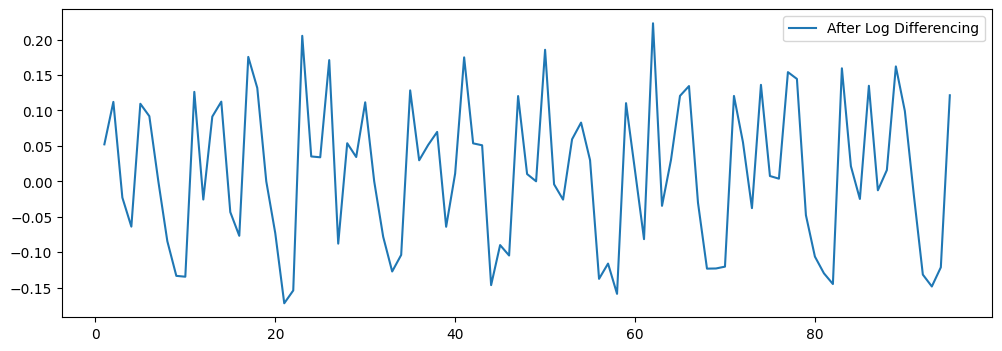

In [80]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

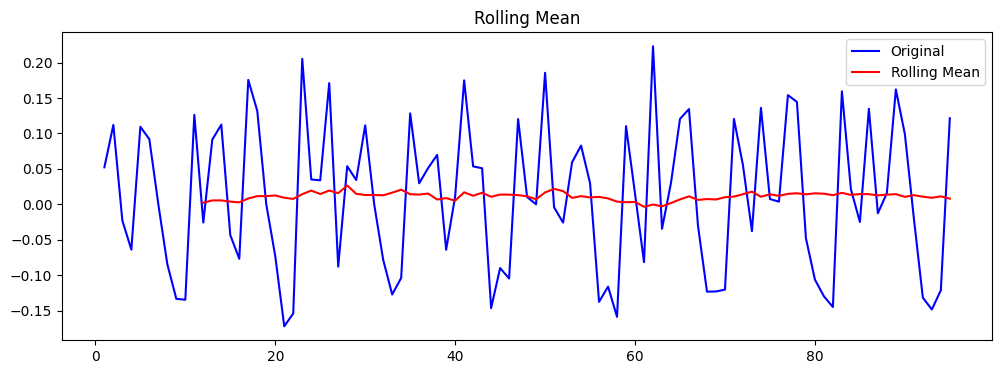

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [81]:
plt.figure(figsize=(12,4))
test_stationarity(log_diff)
adf_test(log_diff)

### Box Cox Transformation

,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


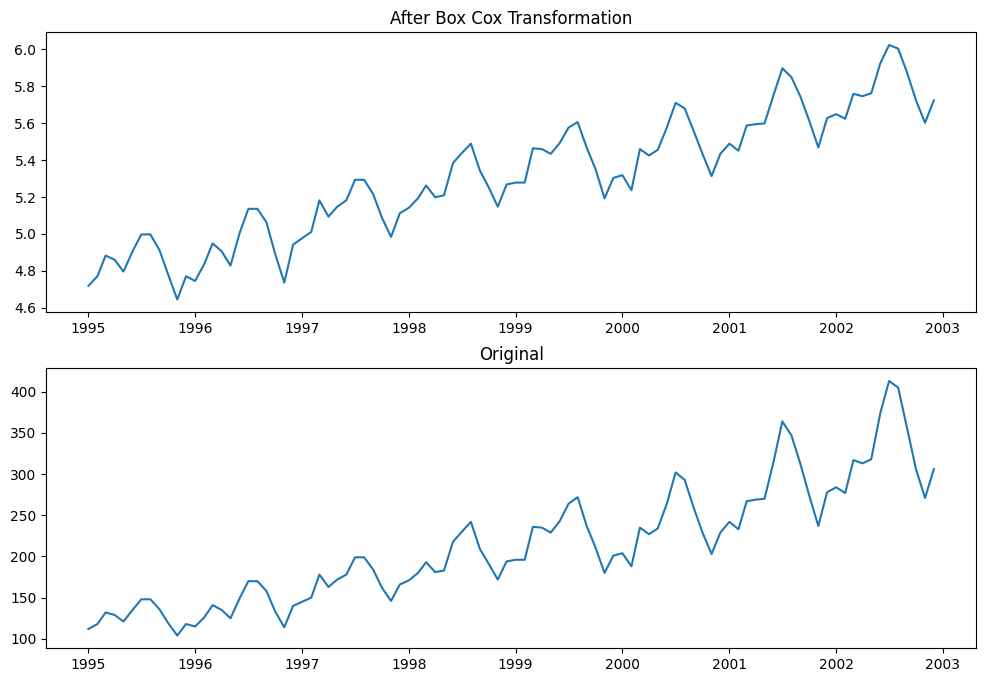

In [82]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(data_M['Passengers'], lmbda=0), data_M.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(data_M, label='original')
axis[1].set_title('Original')
plt.show()

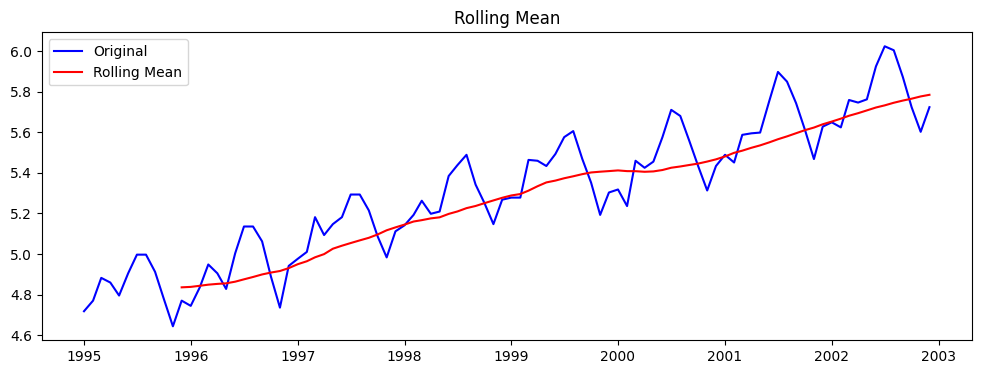

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [83]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)
adf_test(data_boxcox)

### Differencing of the Box-Cox Transformation

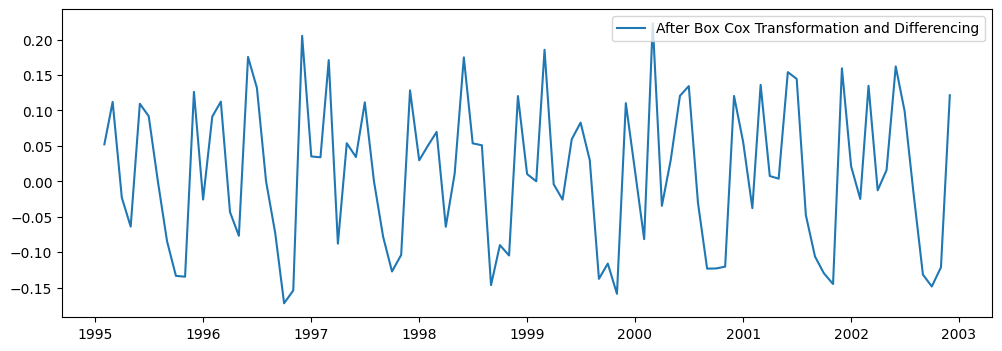

In [84]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

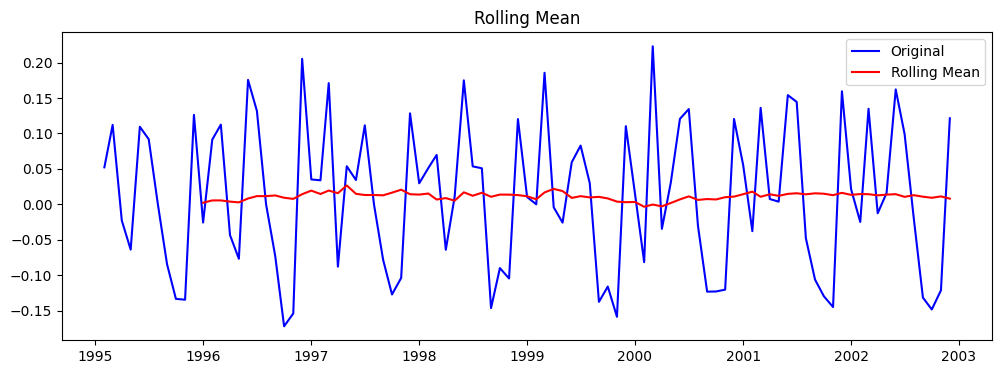

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Fail to reject the null hypothesis
Data is non-stationary


In [85]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)
adf_test(data_boxcox_diff)

### Building The Time Series Forecasting with Optimal Value using ARIMA

In [86]:
size=12
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]
test_data_boxcox_diff

,Passengers
Date,
1996-02-01,0.091350
1996-03-01,0.112478
1996-04-01,-0.043485
1996-05-01,-0.076961
1996-06-01,0.175633
...,...
2002-08-01,-0.019561
2002-09-01,-0.131769
2002-10-01,-0.148533


### ARIMA Hyperparameter Tuning


In [87]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE
from statsmodels.tsa.arima.model import ARIMA
def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Passengers, p_values, d_values, q_values)

#### Inverse transformation of the Box-Cox Differencing

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

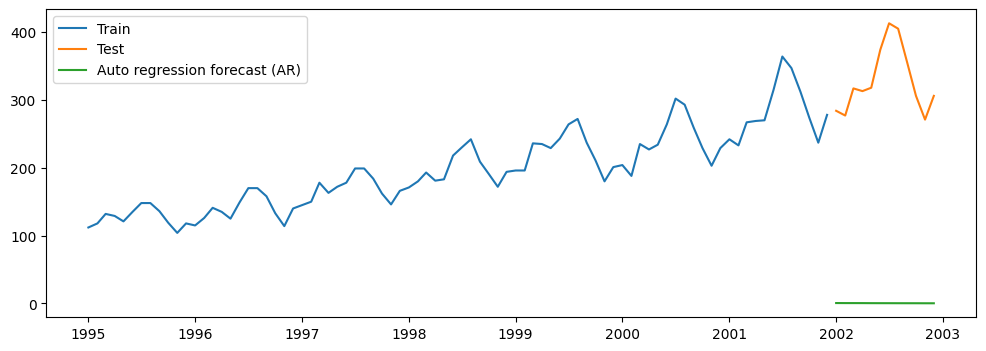

In [90]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

## Model Evaluation
### RMSE (Root Mean Squared Error)

In [91]:
rmse_arima = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

331.02

### MAPE (Mean Absolute Percent Error)

In [92]:
mape_arima = round(np.mean(np.abs((test_data.Passengers - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_arima

99.87

### Observation
1. We can see that AR model has done reasonably good job but not better than Holt's method.
2. We souldn't compare it with Holt's method. Because Holt's method captures seasonality

### Analysing the Residuals
#### The mean of the Residual should be zero or close to Zero

In [93]:
model_residual = model_fit.resid
model_residual.mean()

-0.01323028389883567

#### Residuals must be stationary

In [94]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


## Conclusion:

### The best model we have got so far with the lowest RMSE and lowest MAPE.

In [95]:
# import plotly.express as px

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.seasonal import seasonal_decompose

